**Дистрибуция кода и развертывание: путь от лэптопа до кластера_05.06**

Лектор: **Титова Наталия**

Контакты:
Telegram: **@natalitics**

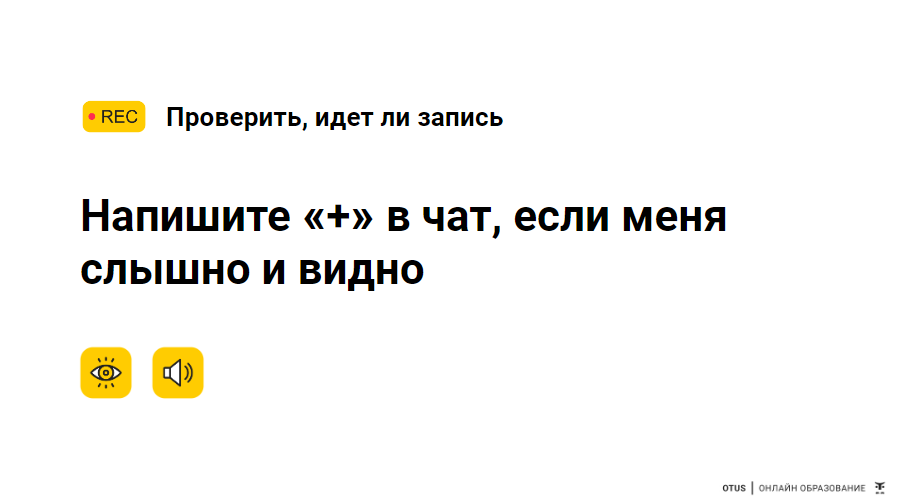

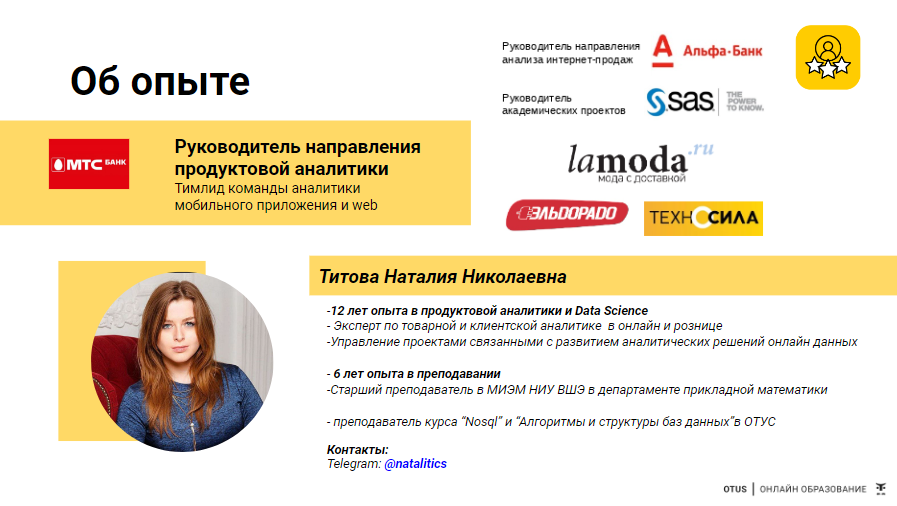

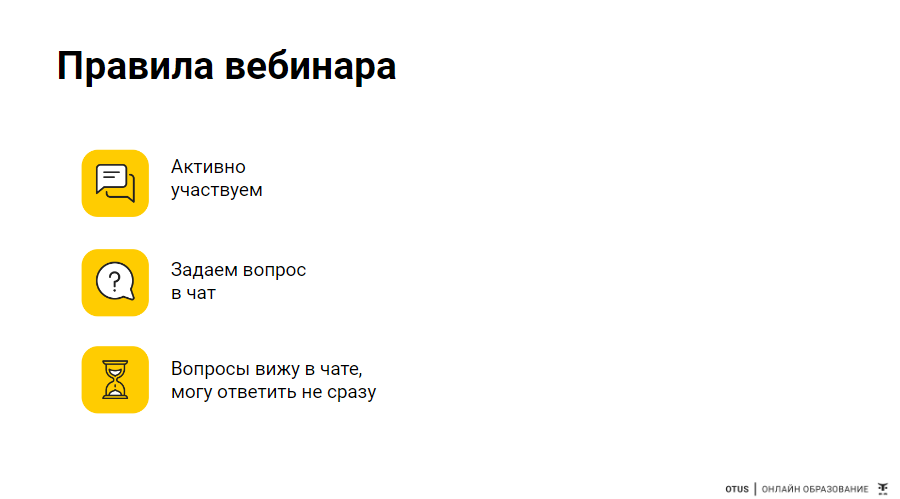

# Build & Deploy

## Тема занятия
Дистрибуция кода и развертывание: путь от лэптопа до кластера

## Цели
- Рассмотреть различные способы сборки Python проектов.
- Обсудить способы и каналы дистрибуции проектов.
- Изучить лучшие практики по контейнеризации Python приложений.
- Рассмотреть Kubernetes в качестве основной среды для запуска контейнеров.

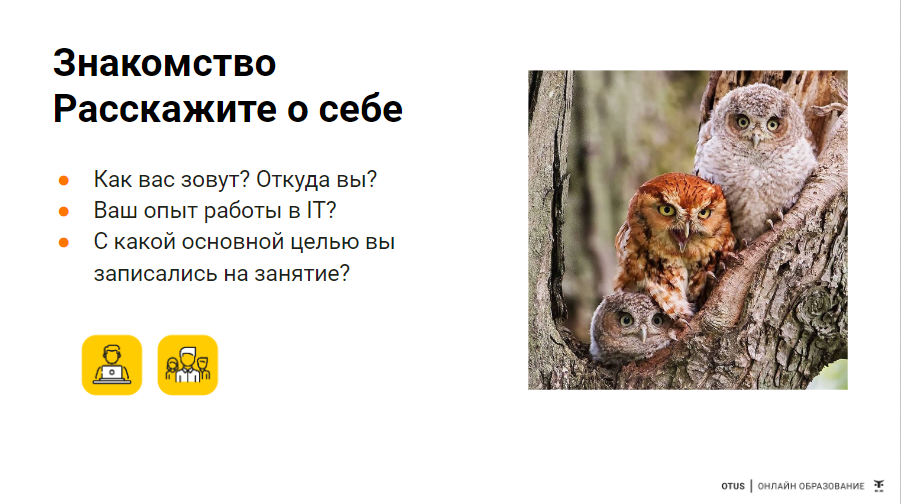

## Краткое содержание

Краткое содержание
1. Packaging

*  overview of python packaging (Обзор упаковки Python)
*  испольные zip файлы и zipimport
*   setuptools и disutils
*   egg
*  sdist
*   wheel
*   frozen modules
*  anaconda

2. PyPI
обзор
supply chain attack
создание локального зеркала
Пакетные менеджеры ОС
yum и rpm
apt и deb
преимущества ПМ
Containers
docker
краткий обзор принципов работы
лучшие практики по созданию Dockerfile’ов
обзор альтернатив: vagrant (не контейнеры, но все же), podman, containerd, runc, cri-o
Kubernetes
Обзор архитектуры
Базовый kubectl (прочесть логи пода, посмотреть манифесты ресурсов)
Пакетный менеджер Helm
Свойства kubernetes-ready приложения
stateless
probes
logging
мониторинг -> prometheus
секреты -> vault
какие типы деплойментов есть и как их можно юзать на практике
Упомянуть minikube, k3d, Lens и k9s


#Packaging

### Обзор упаковки Python

Упаковка Python-программ и библиотек включает в себя различные методы и инструменты, которые помогают разработчикам создавать, распространять и устанавливать программное обеспечение. Ниже рассмотрены основные методы и инструменты упаковки, их преимущества и недостатки.

### Исполняемые ZIP-файлы и zipimport

**Исполняемые ZIP-файлы** — это ZIP-архивы, содержащие Python-код, который можно выполнять напрямую. zipimport — это модуль, который позволяет импортировать модули из ZIP-архивов.

#### Преимущества:
- **Простота**: Легко создать и использовать.
- **Компактность**: Упаковывает все файлы в один архив.
- **Портативность**: Можно легко переносить между системами.

#### Недостатки:
- **Ограниченная функциональность**: Не поддерживает сложные сценарии установки и управления зависимостями.
- **Производительность**: Могут быть проблемы с производительностью при большом количестве файлов.

### setuptools и distutils

**setuptools** и **distutils** — это библиотеки для упаковки и распространения Python-проектов. distutils является стандартной библиотекой Python, а setuptools расширяет ее функциональность.

#### Преимущества:
- **Широкое использование**: Стандарт де-факто для упаковки Python.
- **Поддержка зависимостей**: Позволяет явно указывать зависимости.
- **Интеграция с PyPI**: Легко публиковать пакеты на PyPI.

#### Недостатки:
- **Сложность настройки**: Может быть сложно настроить для новичков.
- **Устаревание distutils**: distutils постепенно заменяется на более современные инструменты.

### EGG

**EGG** — это формат дистрибутива для Python-пакетов, предложенный setuptools.

#### Преимущества:
- **Удобство установки**: Легко устанавливается с помощью easy_install.
- **Поддержка метаданных**: Включает метаданные о пакете и его зависимостях.

#### Недостатки:
- **Устаревание**: EGG формат постепенно заменяется на WHEEL.
- **Совместимость**: Меньшая совместимость с современными инструментами и стандартами.

### SDIST

**SDIST** (Source Distribution) — это архив исходного кода пакета, созданный с помощью setuptools или distutils.

#### Преимущества:
- **Прозрачность**: Включает исходный код, что упрощает аудит и модификацию.
- **Широкая поддержка**: Поддерживается большинством инструментов упаковки и распространения.

#### Недостатки:
- **Сложность установки**: Требует компиляции на стороне пользователя, что может быть проблематично.

### WHEEL

**WHEEL** — это современный формат дистрибутива для Python-пакетов, который заменяет EGG.

#### Преимущества:
- **Быстрая установка**: Не требует компиляции, что ускоряет установку.
- **Совместимость**: Широко поддерживается современными инструментами, такими как pip.
- **Удобство использования**: Легко создавать и распространять.

#### Недостатки:
- **Бинарные зависимости**: Могут возникнуть проблемы с совместимостью бинарных зависимостей на разных платформах.

### Frozen Modules

**Frozen Modules** — это модули Python, которые компилируются в исполняемые файлы с помощью инструментов, таких как PyInstaller, cx_Freeze, или py2exe.

#### Преимущества:
- **Портативность**: Создает автономные исполняемые файлы, которые можно запускать без установки Python.
- **Защита кода**: Усложняет доступ к исходному коду.

#### Недостатки:
- **Размер файла**: Исполняемые файлы могут быть большими.
- **Совместимость**: Могут возникнуть проблемы с совместимостью на разных платформах.

### Anaconda

**Anaconda** — это дистрибутив Python, который включает в себя большое количество научных библиотек и инструментов для управления пакетами и окружениями.

#### Преимущества:
- **Полнота**: Включает все необходимые инструменты для научных вычислений.
- **Управление окружениями**: Легко создавать и управлять виртуальными окружениями.
- **Поддержка бинарных пакетов**: Устанавливает бинарные пакеты, что упрощает установку зависимостей.

#### Недостатки:
- **Размер дистрибутива**: Anaconda занимает много места на диске.
- **Сложность настройки**: Может быть сложным для новичков.

### Сравнение и выводы

| Метод/Инструмент      | Преимущества                                          | Недостатки                                                   |
|-----------------------|-------------------------------------------------------|--------------------------------------------------------------|
| Исполняемые ZIP-файлы | Простота, компактность, портативность                 | Ограниченная функциональность, производительность            |
| setuptools и distutils | Широкое использование, поддержка зависимостей, интеграция с PyPI | Сложность настройки, устаревание distutils                 |
| EGG                   | Удобство установки, поддержка метаданных              | Устаревание, меньшая совместимость                           |
| SDIST                 | Прозрачность, широкая поддержка                       | Сложность установки                                          |
| WHEEL                 | Быстрая установка, совместимость, удобство использования | Бинарные зависимости                                         |
| Frozen Modules        | Портативность, защита кода                            | Размер файла, совместимость                                  |
| Anaconda              | Полнота, управление окружениями, поддержка бинарных пакетов | Размер дистрибутива, сложность настройки                     |

Каждый метод упаковки имеет свои преимущества и недостатки. Выбор подходящего метода зависит от конкретных требований проекта и предпочтений разработчика.

Когда вы разрабатываете приложение или анализ данных на своем ноутбуке, вам может потребоваться перенести этот код на кластер для масштабирования, повышения производительности или для работы с большими объемами данных. Этот процесс включает в себя несколько этапов, таких как упаковка кода, управление зависимостями и развертывание на кластере.

** Основные шаги**

1. **Разработка и тестирование на локальной машине**:
   - Разработка и тестирование кода на вашем ноутбуке.
   - Использование виртуальных сред для управления зависимостями.

2. **Упаковка кода**:
   - Создание переносимого пакета, который включает ваш код и все необходимые зависимости.
   - Использование инструментов, таких как conda, pip, Docker или Singularity.

3. **Подготовка к развертыванию**:
   - Подготовка конфигурационных файлов и скриптов для автоматизации развертывания.
   - Настройка параметров среды выполнения (например, переменных окружения).

4. **Развертывание на кластере**:
   - Передача пакета на кластер.
   - Настройка и запуск приложения на кластере.
   - Мониторинг и управление задачами на кластере.

**Упаковка кода**
 1. Упаковка с использованием Conda

Conda позволяет создать воспроизводимое окружение, которое можно легко перенести на другую машину или кластер.
BASH



```
# Создание новой среды
conda create --name myenv python=3.8

# Активирование среды
conda activate myenv

# Установка необходимых пакетов
conda install numpy pandas

# Экспорт окружения в файл
conda env export > environment.yml
```




Для развертывания на другой машине:


BASH
```
# Копирование environment.yml на другую машину
scp environment.yml user@remote:/path/to/destination

# Восстановление окружения на другой машине
conda env create -f environment.yml
```



#### 2. Упаковка с использованием Docker

Docker позволяет создать контейнер, который включает в себя все необходимые зависимости и конфигурации.

Docker

```
# Dockerfile
FROM python:3.8-slim

# Установка необходимых пакетов
RUN pip install numpy pandas

# Копирование вашего кода в контейнер
COPY . /app

WORKDIR /app

CMD ["python", "your_script.py"]
```



Для создания и запуска Docker-контейнера:

BASH

```
# Создание Docker-образа
docker build -t myapp .

# Запуск контейнера
docker run myapp
```



#### 3. Упаковка с использованием Singularity (для HPC-кластеров)

Singularity часто используется в высокопроизводительных вычислительных кластерах (HPC), где Docker может быть не поддержан.

BASH

```
# Создание файла рецепта Singularity (Singularity.def)
BootStrap: docker
From: python:3.8-slim

%post
    pip install numpy pandas

%files
    your_script.py /app/your_script.py

%runscript
    exec python /app/your_script.py
```



Для создания и запуска Singularity-контейнера:

BASH


```
# Создание Singularity-образа
singularity build myapp.sif Singularity.def

# Запуск контейнера
singularity run myapp.sif
```



** Развертывание на кластере**

После упаковки вашего приложения следующим шагом будет его развертывание на кластере.

1. **Передача пакета на кластер**:
   - Используйте scp или rsync для копирования файлов на кластер.

2. **Настройка окружения**:
   - Настройте виртуальную среду или контейнер на кластере.
   - Убедитесь, что все необходимые зависимости установлены.

3. **Запуск приложения**:
   - Используйте системы управления задачами, такие как Slurm, для запуска ваших задач.
   - Пример скрипта для Slurm:

BASH

```
#!/bin/bash
#SBATCH --job-name=myjob
#SBATCH --output=output.log
#SBATCH --error=error.log
#SBATCH --time=01:00:00
#SBATCH --partition=compute

# Активируйте вашу среду или загрузите модуль
source activate myenv

# Запустите ваше приложение
python your_script.py
```



Процесс дистрибуции кода и развертывания на кластере включает в себя несколько этапов, от разработки и тестирования на локальной машине до упаковки кода и его развертывания на кластерной инфраструктуре. Использование инструментов, таких как Conda, Docker или Singularity, позволяет создать воспроизводимые и переносимые окружения, что значительно упрощает процесс масштабирования и развёртывания приложений.

**Давайте рассмотрим каждый подробно**


### Packaging (Обзор упаковки Python)

Упаковка Python-программ позволяет легко распространять и устанавливать программное обеспечение. Основные инструменты для упаковки включают setuptools, wheel и twine.

### Основные шаги упаковки:

1. **Создание структуры проекта**: Организация файлов и директорий.
2. **Создание файла setup.py**: Определение метаданных пакета и зависимостей.
3. **Создание дистрибутива**: Сборка пакета в форматах source distribution (sdist) и wheel.
4. **Публикация на PyPI**: Загрузка пакета на PyPI с помощью twine.



#### Зачем нужна упаковка Python

Упаковка Python-программ и библиотек необходима для упрощения распространения, установки и управления программным обеспечением. Этот процесс позволяет разработчикам:

1. **Упрощать установку**: Пользователи могут легко устанавливать и обновлять программное обеспечение.
2. **Управлять зависимостями**: Автоматически устанавливать необходимые библиотеки и пакеты.
3. **Обеспечивать совместимость**: Гарантировать, что программа будет работать на разных системах и конфигурациях.
4. **Упрощать распространение**: Делать программное обеспечение доступным через репозитории, такие как PyPI.
5. **Обеспечивать повторяемость**: Создавать воспроизводимые окружения для разработки и тестирования.

#### Процесс упаковки Python

Процесс упаковки Python-программ включает несколько ключевых шагов:

1. **Создание структуры проекта**:
    - Создание необходимых директорий и файлов, таких как setup.py, README.md, и LICENSE.
    - Организация исходного кода в соответствующие папки.

2. **Настройка метаданных**:
    - Заполнение файла setup.py или pyproject.toml метаданными, такими как имя пакета, версия, автор, описание и зависимости.

3. **Сборка пакета**:
    - Использование инструментов, таких как setuptools, для создания дистрибутивов, например, SDIST (Source Distribution) и WHEEL (Binary Distribution).

4. **Тестирование пакета**:
    - Проверка работоспособности пакета в различных окружениях.
    - Убедиться, что все зависимости указаны правильно и пакет работает как ожидается.

5. **Публикация пакета**:
    - Загрузка пакета на PyPI или другой репозиторий с помощью инструментов, таких как twine.

6. **Установка пакета**:
    - Пользователи могут установить пакет с помощью pip или других менеджеров пакетов.

#### Плюсы и минусы различных методов упаковки

| Метод/Инструмент      | Плюсы                                                   | Минусы                                                   |
|-----------------------|---------------------------------------------------------|----------------------------------------------------------|
| **Исполняемые ZIP-файлы** | Простота, компактность, портативность                     | Ограниченная функциональность, производительность        |
| **setuptools и distutils** | Широкое использование, поддержка зависимостей, интеграция с PyPI | Сложность настройки, устаревание distutils             |
| **EGG**               | Удобство установки, поддержка метаданных                | Устаревание, меньшая совместимость                       |
| **SDIST**             | Прозрачность, широкая поддержка                         | Сложность установки                                      |
| **WHEEL**             | Быстрая установка, совместимость, удобство использования | Бинарные зависимости                                     |
| **Frozen Modules**    | Портативность, защита кода                              | Размер файла, совместимость                              |
| **Anaconda**          | Полнота, управление окружениями, поддержка бинарных пакетов | Размер дистрибутива, сложность настройки                 |

## Упаковка исполняемых ZIP файлов и использование zipimport в Python

Python предоставляет возможность упаковывать модули и пакеты в ZIP-архивы и импортировать их напрямую из этих архивов с помощью модуля zipimport. Это может быть полезно для упрощения распространения и установки программного обеспечения, а также для уменьшения занимаемого места.

### Зачем это необходимо

1. **Упрощение распространения**: Один ZIP-файл может содержать все необходимые модули и пакеты, что упрощает процесс распространения.
2. **Уменьшение размера**: Упакованные файлы могут занимать меньше места благодаря сжатию.
3. **Безопасность**: Упаковка в ZIP-архив может помочь защитить исходный код от случайных изменений.
4. **Удобство использования**: Возможность запускать Python-программы непосредственно из ZIP-архива без распаковки.

### Преимущества использования zipimport

1. **Компактность**: ZIP-архивы могут быть сжаты, что уменьшает размер файлов.
2. **Удобство распространения**: Один файл может содержать все необходимые модули и пакеты.
3. **Простота использования**: Python поддерживает импорт модулей прямо из ZIP-архивов без необходимости их распаковки.

### Недостатки использования zipimport

1. **Производительность**: Импорт из ZIP-архива может быть медленнее, чем из обычной файловой системы.
2. **Совместимость**: Некоторые библиотеки и модули могут не работать корректно при импорте из ZIP-архива.
3. **Отладка**: Отладка кода, упакованного в ZIP-архив, может быть сложнее.



Python позволяет упаковывать приложения в исполняемые ZIP файлы, что делает их удобными для распространения и запуска. Модуль zipimport позволяет импортировать модули и пакеты непосредственно из ZIP архивов.

### Основные шаги упаковки в исполняемый ZIP файл:

1. **Создание структуры проекта**: Организация файлов и директорий.
2. **Создание ZIP архива**: Упаковка всех необходимых файлов в ZIP архив.
3. **Добавление исполняемого файла**: Создание исполняемого файла с указанием использования ZIP архива.



### Пример создания и использования ZIP-архива

1. Создайте структуру проекта:



```
my_project/
    my_package/
        __init__.py
        module.py
    main.py
```



2. Напишите код в my_package/module.py:

In [ ]:
# my_package/module.py
def hello():
    print("Hello from zip package!")

3. Напишите код в main.py:

In [ ]:
# main.py
from my_package.module import hello

if __name__ == "__main__":
    hello()

4. Упакуйте проект в ZIP-архив:

Bash



```
# Перейдите в директорию my_project
cd my_project

# Создайте ZIP-архив
zip -r my_project.zip .
```



5. Запустите программу из ZIP-архива:

Bash


```
# Запуск программы из ZIP-архива
python my_project.zip/main.py
```



### Использование zipimport для импорта модулей из ZIP-архива

1. Создайте структуру проекта:



```
my_project/
    my_package/
        __init__.py
        module.py
    zip_import_example.py
```



2. Напишите код в my_package/module.py:

In [ ]:
# my_package/module.py
def hello():
    print("Hello from zip package!")

3. Упакуйте проект в ZIP-архив:

BASH


```
# Перейдите в директорию my_project
cd my_project

# Создайте ZIP-архив
zip -r my_project.zip my_package
```



4. Напишите код в zip_import_example.py:

In [ ]:
# zip_import_example.py
import zipimport

# Создайте объект zipimporter для нашего архива
zip_importer = zipimport.zipimporter('my_project.zip')

# Импортируйте модуль из архива
module = zip_importer.load_module('my_package.module')

# Вызовите функцию из импортированного модуля
module.hello()


5. Запустите zip_import_example.py:

BASH


```
python zip_import_example.py
```



**Использование ZIP-архивов и модуля zipimport предоставляет удобный способ упаковки и распространения Python-программ.** Это может быть полезно для уменьшения размера файлов, упрощения установки и повышения безопасности кода. Однако следует учитывать возможные недостатки, такие как снижение производительности и сложности при отладке.

## Упаковка с использованием `setuptools` и `distutils`

## Упаковка Python проектов в формат egg


Формат egg был одним из первых стандартов для упаковки и распространения Python-проектов. Он был разработан как часть библиотеки Setuptools и представляет собой архив, содержащий все необходимые файлы для установки и использования пакета.

### Зачем использовать формат egg

Формат egg был создан для решения нескольких задач:

1. **Упрощение установки пакетов**: egg позволяет легко устанавливать и удалять пакеты, управлять зависимостями и обновлениями.
2. **Поддержка метаданных**: egg включает метаданные о пакете, такие как версия, автор, зависимости и т.д.
3. **Совместимость с Setuptools**: Формат egg тесно интегрирован с библиотекой Setuptools, что облегчает его использование.

### Преимущества формата egg

1. **Удобство использования**: Формат egg позволяет легко устанавливать и управлять пакетами.
2. **Поддержка метаданных**: Метаданные помогают отслеживать зависимости и версии пакетов.
3. **Совместимость с Setuptools**: Пакеты в формате egg хорошо работают с Setuptools.

### Недостатки формата egg

1. **Устаревание**: Формат egg постепенно вытесняется более современным форматом wheel.
2. **Ограниченная поддержка**: Некоторые инструменты и библиотеки могут не поддерживать формат egg.
3. **Сложность управления**: В некоторых случаях управление пакетами в формате egg может быть сложным.


Формат egg — это один из способов упаковки и распространения Python проектов. Хотя его постепенно заменяет формат wheel, egg все еще используется в некоторых проектах и имеет свои преимущества.

### Основные шаги упаковки в egg:

1. **Создание структуры проекта**: Организация файлов и директорий.
2. **Создание файла setup.py**: Описание проекта и его зависимостей.
3. **Сборка egg пакета**: Использование setuptools для создания .egg файла.



### Пример создания пакета в формате egg

1. Создайте структуру проекта:


```
my_project/
    my_package/
        __init__.py
        module.py
    setup.py
```



2. Напишите код в my_package/module.py:

In [ ]:
# my_package/module.py
def hello():
    print("Hello from egg package!")

3. Создайте файл setup.py:

In [ ]:
# setup.py
from setuptools import setup, find_packages

setup(
    name='my_package',
    version='0.1',
    packages=find_packages(),
    author='Your Name',
    author_email='your.email@example.com',
    description='A simple example package',
)

4. Упакуйте пакет в формат egg:

BASH

```
# Упаковка пакета в формат egg
python setup.py bdist_egg

```

После выполнения этой команды будет создан файл с расширением .egg в каталоге dist.



**Формат egg был важным шагом в развитии инструментов для упаковки и распространения Python-проектов**. Однако в последние годы он постепенно вытесняется более современным форматом wheel, который предлагает лучшие возможности и совместимость. Несмотря на это, понимание формата egg может быть полезным для работы с устаревшими проектами или инструментами, которые его поддерживают.

## Упаковка Python: SDIST (Source Distribution)


#### Что такое SDIST

SDIST (Source Distribution) — это формат дистрибутива, который содержит исходный код Python-пакета. Основная цель SDIST — предоставить исходный код пакета в стандартном формате, который можно легко распространять и устанавливать.

#### Зачем необходим SDIST

1. **Прозрачность**: Пакет содержит исходный код, что позволяет пользователям и разработчикам видеть, как он работает.
2. **Компиляция**: Позволяет пользователям компилировать код для своей платформы, что может быть полезно для специфических системных настроек.
3. **Совместимость**: Обеспечивает совместимость с различными версиями Python и операционными системами.
4. **Модификация**: Пользователи могут легко модифицировать исходный код под свои нужды.
5. **Соответствие лицензиям**: Некоторые лицензии на программное обеспечение требуют предоставления исходного кода.

#### Процесс создания SDIST

1. **Создание структуры проекта**:
    - Создайте директорию для вашего проекта.
    - Внутри этой директории создайте поддиректорию с именем вашего пакета, например, my_package.
    - Добавьте необходимые файлы, такие как __init__.py, README.md, LICENSE и setup.py.

    Пример структуры проекта:



```
   my_project/
    ├── my_package/
    │   └── __init__.py
    ├── README.md
    ├── LICENSE
    └── setup.py
```



2. **Настройка файла setup.py**:
    - Файл setup.py содержит метаданные о пакете и инструкции для его сборки.

    Пример setup.py:

In [ ]:
from setuptools import setup, find_packages

    setup(
        name='my_package',
        version='0.1',
        packages=find_packages(),
        install_requires=[
            # Список зависимостей
        ],
        author='Ваше имя',
        author_email='ваш_email@example.com',
        description='Краткое описание вашего пакета',
        long_description=open('README.md').read(),
        long_description_content_type='text/markdown',
        url='https://github.com/ваш_репозиторий',
        classifiers=[
            'Programming Language :: Python :: 3',
            'License :: OSI Approved :: MIT License',
            'Operating System :: OS Independent',
        ],
        python_requires='>=3.6',
    )

3. **Сборка SDIST**:
    - Используйте команду python setup.py sdist для создания архива с исходным кодом.
    
    Пример команды:

BASH


```
python setup.py sdist
```



4. **Проверка и тестирование**:
    - Проверьте созданный архив в директории dist.
    - Убедитесь, что все файлы и зависимости включены правильно.

5. **Публикация на PyPI**:
    - Используйте инструмент twine для загрузки пакета на PyPI.

    Пример команд:

BASH


```
 twine upload dist/*
```



#### Плюсы и минусы SDIST

| Плюсы                                                   | Минусы                                                   |
|---------------------------------------------------------|----------------------------------------------------------|
| **Прозрачность**: Исходный код доступен пользователям   | **Сложность установки**: Требуется компиляция на стороне пользователя |
| **Совместимость**: Работает на различных платформах     | **Зависимости**: Необходимость установки зависимостей вручную |
| **Модификация**: Легко изменять и адаптировать код      | **Размер файла**: Может быть больше по сравнению с бинарными дистрибутивами |
| **Соответствие лицензиям**: Соответствует требованиям лицензий | **Производительность**: Может потребоваться время на компиляцию |

SDIST — это важный формат дистрибутива для распространения исходного кода Python-пакетов. Он обеспечивает прозрачность, совместимость и возможность модификации кода, но может требовать дополнительных шагов для установки и настройки на стороне пользователя. Выбор SDIST зависит от конкретных требований проекта и предпочтений разработчиков и пользователей

## Упаковка Python: Wheel

#### Что такое Wheel

Wheel — это формат бинарного дистрибутива для Python-пакетов. Он был введен как более современная и быстрая альтернатива старому формату egg. Основная цель Wheel — упростить и ускорить установку пакетов.

#### Зачем необходим Wheel

1. **Скорость установки**: Установка Wheel-пакетов значительно быстрее, так как они уже скомпилированы.
2. **Удобство**: Установка не требует компиляции, что особенно полезно для пользователей, у которых могут отсутствовать необходимые инструменты для сборки.
3. **Совместимость**: Wheel-пакеты могут быть созданы для различных платформ и версий Python, что делает их универсальными.
4. **Распределение**: Wheel-пакеты легко распространять через PyPI или другие репозитории.

#### Процесс создания Wheel

1. **Создание структуры проекта**:
    - Создайте директорию для вашего проекта.
    - Внутри этой директории создайте поддиректорию с именем вашего пакета, например, my_package.
    - Добавьте необходимые файлы, такие как __init__.py, README.md, LICENSE и setup.py.

    Пример структуры проекта:



```
    my_project/
    ├── my_package/
    │   └── __init__.py
    ├── README.md
    ├── LICENSE
    └── setup.py
    
```



2. **Настройка файла setup.py**:
    - Файл setup.py содержит метаданные о пакете и инструкции для его сборки.

    Пример setup.py:

In [ ]:
from setuptools import setup, find_packages

    setup(
        name='my_package',
        version='0.1',
        packages=find_packages(),
        install_requires=[
            # Список зависимостей
        ],
        author='Ваше имя',
        author_email='ваш_email@example.com',
        description='Краткое описание вашего пакета',
        long_description=open('README.md').read(),
        long_description_content_type='text/markdown',
        url='https://github.com/ваш_репозиторий',
        classifiers=[
            'Programming Language :: Python :: 3',
            'License :: OSI Approved :: MIT License',
            'Operating System :: OS Independent',
        ],
        python_requires='>=3.6',
    )

3. **Сборка Wheel**:
    - Убедитесь, что у вас установлены wheel и setuptools.

    Пример команды для установки необходимых инструментов:

BASH


```
 pip install wheel setuptools
```



 - Используйте команду python setup.py bdist_wheel для создания Wheel-пакета.

    Пример команды:

BASH


```
python setup.py bdist_wheel
```



4. **Проверка и тестирование**:
    - Проверьте созданный файл в директории dist.
    - Убедитесь, что все файлы и зависимости включены правильно.

5. **Публикация на PyPI**:
    - Используйте инструмент twine для загрузки пакета на PyPI.

    Пример команд:

BASH


```
twine upload dist/*
```



#### Плюсы и минусы Wheel

| Плюсы                                                   | Минусы                                                   |
|---------------------------------------------------------|----------------------------------------------------------|
| **Скорость установки**: Быстрая установка без компиляции | **Размер файла**: Может быть больше по сравнению с исходным кодом |
| **Удобство**: Не требует наличия инструментов для сборки | **Совместимость**: Требуется создание отдельных Wheel для каждой платформы |
| **Совместимость**: Поддержка различных платформ и версий Python | **Прозрачность**: Пользователь не видит исходный код напрямую |
| **Распределение**: Легко распространяется через PyPI     | **Модификация**: Сложнее модифицировать по сравнению с исходным кодом |


**Wheel**— это мощный формат бинарного дистрибутива, который значительно упрощает и ускоряет процесс установки Python-пакетов. Он особенно полезен для пользователей, которым не требуется доступ к исходному коду или которые не имеют необходимых инструментов для компиляции. Однако разработчикам может потребоваться создавать отдельные Wheel для каждой целевой платформы и версии Python, что может усложнить процесс публикации.

## Упаковка Python-модулей: Понятие и Процесс

#### Что такое упаковка модулей

Упаковка модулей в Python — это процесс подготовки вашего кода для распространения и установки. Это включает в себя организацию файлов, написание метаданных и создание дистрибутивов, которые могут быть легко установлены с помощью инструментов вроде pip.

#### Зачем необходима упаковка модулей

1. **Распределение**: Упакованные модули можно легко распространять через PyPI или другие репозитории.
2. **Повторное использование**: Упаковка позволяет другим разработчикам легко использовать ваш код в своих проектах.
3. **Версионирование**: Позволяет управлять версиями вашего пакета и обеспечивать совместимость с различными версиями Python и зависимостями.
4. **Автоматизация установки**: Упрощает процесс установки и управления зависимостями.

#### Процесс упаковки модулей

1. **Создание структуры проекта**:
    - Создайте директорию для вашего проекта.
    - Внутри этой директории создайте поддиректорию с именем вашего пакета, например, my_module.
    - Добавьте необходимые файлы, такие как __init__.py, README.md, LICENSE и setup.py.

    Пример структуры проекта:



```
  my_project/
    ├── my_module/
    │   └── __init__.py
    ├── README.md
    ├── LICENSE
    └── setup.py
```



2. **Настройка файла setup.py**:
    - Файл setup.py содержит метаданные о пакете и инструкции для его сборки.

    Пример setup.py:

In [ ]:
 from setuptools import setup, find_packages

    setup(
        name='my_module',
        version='0.1',
        packages=find_packages(),
        install_requires=[
            # Список зависимостей
        ],
        author='Ваше имя',
        author_email='ваш_email@example.com',
        description='Краткое описание вашего модуля',
        long_description=open('README.md').read(),
        long_description_content_type='text/markdown',
        url='https://github.com/ваш_репозиторий',
        classifiers=[
            'Programming Language :: Python :: 3',
            'License :: OSI Approved :: MIT License',
            'Operating System :: OS Independent',
        ],
        python_requires='>=3.6',
    )

3. **Создание файла MANIFEST.in (опционально)**:
    - Этот файл может быть использован для включения дополнительных файлов в пакет, таких как документация или данные.

    Пример MANIFEST.in:
    



```
include README.md
include LICENSE
```



4. **Сборка пакета**:
    - Убедитесь, что у вас установлены setuptools и wheel.

    Пример команды для установки необходимых инструментов:

BASH

` pip install setuptools wheel`

 - Используйте команду python setup.py sdist bdist_wheel для создания исходного дистрибутива и Wheel-пакета.

    Пример команды:

BASH

`python setup.py sdist bdist_wheel`

5. **Проверка и тестирование**:
    - Проверьте созданные файлы в директории dist.
    - Убедитесь, что все файлы и зависимости включены правильно.

6. **Публикация на PyPI**:
    - Используйте инструмент twine для загрузки пакета на PyPI.

    Пример команд:

BASH


```
    pip install twine
    twine upload dist/*
    
```



#### Плюсы и минусы упаковки модулей

| Плюсы                                                   | Минусы                                                   |
|---------------------------------------------------------|----------------------------------------------------------|
| **Распределение**: Легко распространять через PyPI       | **Сложность**: Требуется знание инструментов упаковки     |
| **Повторное использование**: Упрощает использование вашего кода другими разработчиками | **Поддержка**: Требуется поддержка и обновление пакетов   |
| **Версионирование**: Управление версиями и зависимостями | **Совместимость**: Необходимость тестирования на различных платформах |
| **Автоматизация установки**: Упрощает процесс установки | **Документация**: Требуется создание и поддержка документации |

**Упаковка Python-модулей**— это важный процесс, который позволяет вам делиться своим кодом с сообществом, управлять зависимостями и версиями, а также автоматизировать установку. Несмотря на некоторые сложности, такие как необходимость знания инструментов упаковки и поддержка пакетов, преимущества далеко перевешивают недостатки.

## Описание процесса упаковки Anaconda

Anaconda — это дистрибутив Python, который включает в себя множество библиотек и инструментов для научных вычислений, анализа данных и машинного обучения. Упаковка Anaconda может означать создание среды, которая включает в себя все необходимые зависимости и библиотеки для вашего проекта. Этот процесс позволяет легко разворачивать и переносить проекты на другие машины.

### Зачем это необходимо

1. **Изоляция окружений**: Упаковка позволяет создать изолированные среды, что предотвращает конфликты между зависимостями разных проектов.
2. **Упрощение развертывания**: Готовая среда может быть легко перенесена на другую машину, что упрощает процесс развертывания.
3. **Репродуцируемость**: Возможность воспроизвести окружение с точностью до версии библиотек обеспечивает консистентность и предсказуемость выполнения кода.
4. **Управление зависимостями**: Упаковка позволяет точно контролировать версии всех используемых библиотек, что важно для стабильности и совместимости проекта.

### Плюсы

1. **Изоляция**: Полная изоляция окружений предотвращает конфликты между зависимостями разных проектов.
2. **Простота использования**: Anaconda предоставляет удобные инструменты для управления пакетами и средами, такие как conda.
3. **Репродуцируемость**: Возможность создать файл с описанием среды (например, environment.yml), который можно использовать для воспроизведения окружения на другой машине.
4. **Широкий набор библиотек**: Anaconda включает в себя множество популярных библиотек для анализа данных и машинного обучения.
5. **Интеграция с Jupyter**: Простая интеграция с Jupyter Notebook и JupyterLab для интерактивного анализа данных.

### Минусы

1. **Размер дистрибутива**: Anaconda занимает много места на диске, что может быть проблемой для машин с ограниченным объемом памяти.
2. **Сложность настройки**: В некоторых случаях настройка окружений может быть сложной, особенно если требуются специфические версии библиотек.
3. **Производительность**: Из-за большого количества включенных библиотек Anaconda может работать медленнее по сравнению с более легкими альтернативами.
4. **Совместимость**: Иногда могут возникать проблемы с совместимостью между различными версиями библиотек и инструментов.

### Пример процесса упаковки

1. **Создание новой среды**:
    

BASH


```
conda create --name myenv python=3.8
```



2. **Активирование среды**:

BASH


```
conda activate myenv
```



3. **Установка необходимых пакетов**:

BASH


```
conda install numpy pandas scikit-learn
```



4. **Экспорт окружения в файл**:

BASH


```
conda env export > environment.yml
```



5. **Импорт окружения на другой машине**:

BASH


```
 conda env create -f environment.yml
```



Таким образом, упаковка Anaconda среды обеспечивает удобное и надежное управление зависимостями и изоляцию окружений, что делает разработку и развертывание Python проектов более простым и предсказуемым процессом

# PyPI

### Описание процесса публикации пакета на PyPI

PyPI (Python Package Index) — это официальный репозиторий для пакетов Python, где разработчики могут публиковать свои библиотеки и инструменты, чтобы другие могли их легко устанавливать и использовать. Процесс публикации пакета на PyPI включает в себя несколько шагов, таких как подготовка пакета, создание необходимых метаданных и загрузка на сервер PyPI.

### Зачем это необходимо

1. **Распространение**: Публикация на PyPI позволяет сделать ваш пакет доступным для широкой аудитории.
2. **Упрощение установки**: Пользователи могут легко установить ваш пакет с помощью команды pip install.
3. **Версионирование**: PyPI поддерживает управление версиями, что позволяет пользователям выбирать нужную версию вашего пакета.
4. **Сообщество и обратная связь**: Публикация пакета на PyPI позволяет вам получать обратную связь от сообщества и улучшать ваш код.

### Плюсы

1. **Доступность**: Ваш пакет становится доступным для миллионов пользователей по всему миру.
2. **Упрощенная установка**: Пользователи могут легко установить ваш пакет с помощью pip, что упрощает процесс развертывания.
3. **Версионирование**: Вы можете управлять версиями вашего пакета, что позволяет пользователям выбирать стабильные или экспериментальные версии.
4. **Документация и метаданные**: PyPI позволяет добавлять описание, инструкции по установке и другую документацию, что делает ваш пакет более понятным и удобным для использования.
5. **Сообщество**: Публикация на PyPI помогает вам стать частью сообщества разработчиков Python и получать обратную связь.

### Минусы

1. **Подготовка**: Процесс подготовки пакета для публикации может быть сложным и требовать времени.
2. **Поддержка**: После публикации вам нужно будет поддерживать пакет, исправлять ошибки и выпускать обновления.
3. **Безопасность**: Публикация кода в открытый доступ требует внимательного подхода к вопросам безопасности.
4. **Конкуренция**: На PyPI уже существует множество пакетов, и ваш пакет может затеряться среди них.

### Пример процесса публикации

1. **Подготовка проекта**:
    - Создайте структуру проекта:



```
 mypackage/
        ├── mypackage/
        │   ├── __init__.py
        │   └── mymodule.py
        ├── setup.py
        └── README.md
```



2. **Создание файла setup.py**:

In [ ]:
from setuptools import setup, find_packages

    setup(
        name="mypackage",
        version="0.1",
        packages=find_packages(),
        install_requires=[
            # Список зависимостей
        ],
        author="Ваше Имя",
        author_email="ваш.email@example.com",
        description="Краткое описание пакета",
        long_description=open('README.md').read(),
        long_description_content_type='text/markdown',
        url="https://github.com/ваш-репозиторий",
        classifiers=[
            "Programming Language :: Python :: 3",
            "License :: OSI Approved :: MIT License",
            "Operating System :: OS Independent",
        ],
        python_requires='>=3.6',
    )

3. **Установка необходимых инструментов**:

BASH


```
 pip install setuptools wheel twine
```



4. **Создание дистрибутива**:

BASH

` python setup.py sdist bdist_wheel`

BASH


```
twine upload dist/*
```



6. **Установка пакета пользователями**:

BASH


```
pip install mypackage
```



Таким образом, публикация пакета на PyPI делает ваш код доступным для широкой аудитории, упрощает его установку и управление версиями, а также позволяет вам получать обратную связь от сообщества разработчиков Python. https://pypi.org/

### Методы публикации пакетов на PyPI

Существует несколько методов публикации пакетов на PyPI. Основные из них включают использование утилит setuptools, twine и автоматизированных CI/CD систем. Рассмотрим каждый из этих методов более подробно, а также сравним их плюсы и минусы.



### Сравнение методов публикации пакетов на PyPI

Существует несколько методов публикации пакетов на PyPI, каждый из которых имеет свои плюсы и минусы. Рассмотрим основные методы: использование setuptools и twine, использование Poetry и автоматизация с помощью CI/CD систем.

#### 1. Использование setuptools и twine

**Плюсы**:
- **Широкое использование**: Этот метод является стандартом де-факто и поддерживается большинством проектов.
- **Гибкость**: Позволяет настроить множество параметров в файле setup.py.
- **Совместимость**: Работает с различными версиями Python и на разных платформах.
- **Документация и примеры**: Много документации и примеров в интернете, что облегчает обучение и решение проблем.

**Минусы**:
- **Ручной процесс**: Требует выполнения нескольких команд вручную, что может быть неудобно.
- **Сложность настройки**: Для новичков может быть сложно правильно настроить файл setup.py.
- **Меньше автоматизации**: Без использования дополнительных инструментов процесс публикации не автоматизирован.

#### 2. Использование Poetry

**Плюсы**:
- **Удобство использования**: Интуитивно понятный интерфейс и простота команд.
- **Все в одном**: Управление зависимостями и упаковка в одном инструменте.
- **Автоматизация**: Меньше ручных шагов по сравнению с setuptools и twine.
- **Современные возможности**: Поддерживает современные стандарты и имеет встроенную поддержку для работы с виртуальными окружениями.

**Минусы**:
- **Меньшая популярность**: Меньше примеров и документации по сравнению с setuptools.
- **Совместимость**: Может не поддерживать все сценарии, которые поддерживаются setuptools.
- **Зависимость от инструмента**: Проект становится зависимым от одного инструмента для управления зависимостями и публикации.

#### 3. Автоматизация с помощью CI/CD систем (например, GitHub Actions)

**Плюсы**:
- **Автоматизация**: Процесс публикации полностью автоматизирован, что снижает вероятность ошибок.
- **Непрерывная интеграция**: Пакет публикуется при каждом выпуске новой версии, что упрощает релизный процесс.
- **Безопасность**: Секреты (например, учетные данные PyPI) хранятся безопасно в системах CI/CD.
- **Масштабируемость**: Легко интегрируется с другими процессами CI/CD, такими как тестирование и деплой.

**Минусы**:
- **Настройка CI/CD**: Требуется настройка CI/CD системы, что может занять время и потребовать дополнительных знаний.
- **Зависимость от внешних сервисов**: Требуется доступ к интернету и внешним сервисам (например, GitHub).
- **Сложность отладки**: Отладка проблем в CI/CD пайплайнах может быть сложной.

### Сравнительная таблица

| Метод                         | Плюсы                                                                 | Минусы                                                                                  |
|-------------------------------|-----------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| setuptools + twine        | Широкое использование, гибкость, совместимость, много документации    | Ручной процесс, сложность настройки, меньше автоматизации                               |
| Poetry                        | Удобство использования, все в одном, автоматизация, современные возможности | Меньшая популярность, возможные проблемы совместимости, зависимость от инструмента       |
| CI/CD (например, GitHub Actions) | Автоматизация, непрерывная интеграция, безопасность, масштабируемость | Настройка CI/CD, зависимость от внешних сервисов, сложность отладки                      |

#### 1. Использование setuptools и twine

Это наиболее традиционный и широко используемый метод для публикации пакетов на PyPI.

**Шаги**:
1. Подготовьте структуру проекта и создайте файл setup.py.
2. Установите необходимые инструменты:

BASH


```
pip install setuptools wheel twine
```



3. Создайте дистрибутив:

BASH


```
python setup.py sdist bdist_wheel
```



4. Опубликуйте пакет с помощью twine:

BASH


```
twine upload dist/*
```



**Плюсы**:
- **Широкое использование**: Поддерживается большинством проектов и хорошо документирован.
- **Гибкость**: Позволяет настроить множество параметров в setup.py.
- **Совместимость**: Работает с различными версиями Python и на разных платформах.

**Минусы**:
- **Ручной процесс**: Требует выполнения нескольких команд вручную.
- **Сложность настройки**: Для новичков может быть сложно правильно настроить setup.py.

#### 2. Использование Poetry

Poetry — это современный инструмент для управления зависимостями и упаковки в Python.

**Шаги**:
1. Установите Poetry:

BASH


```
    curl -sSL https://install.python-poetry.org | python3 -
```



2. Инициализируйте проект:

BASH


```
poetry init
```



3. Установите зависимости и создайте файл pyproject.toml.
4. Создайте дистрибутив:
    

BASH


```
poetry build
```



5. Опубликуйте пакет:

BASH


```
    poetry publish --username <username> --password <password>
```



**Плюсы**:
- **Удобство использования**: Интуитивно понятный интерфейс и простота команд.
- **Все в одном**: Управление зависимостями и упаковка в одном инструменте.
- **Автоматизация**: Меньше ручных шагов по сравнению с setuptools и twine.

**Минусы**:
- **Меньшая популярность**: Меньше примеров и документации по сравнению с setuptools.
- **Совместимость**: Может не поддерживать все сценарии, которые поддерживаются setuptools.

#### 3. Автоматизация с помощью CI/CD систем (например, GitHub Actions)

Использование CI/CD систем позволяет автоматизировать процесс публикации пакета.

**Шаги**:
1. Настройте ваш проект и создайте файл конфигурации CI/CD (например, .github/workflows/publish.yml для GitHub Actions).
2. Добавьте шаги для сборки и публикации пакета.

Пример конфигурации для GitHub Actions:

YAML


```
name: Publish Python Package

on:
  push:
    tags:
      - 'v*.*.*'

jobs:
  publish:
    runs-on: ubuntu-latest

    steps:
      - uses: actions/checkout@v2

      - name: Set up Python
        uses: actions/setup-python@v2
        with:
          python-version: '3.x'

      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install setuptools wheel twine

      - name: Build package
        run: python setup.py sdist bdist_wheel

      - name: Publish package
        env:
          TWINE_USERNAME: ${{ secrets.PYPI_USERNAME }}
          TWINE_PASSWORD: ${{ secrets.PYPI_PASSWORD }}
        run: twine upload dist/*
```



**Плюсы**:
- **Автоматизация**: Процесс публикации полностью автоматизирован.
- **Непрерывная интеграция**: Пакет публикуется при каждом выпуске новой версии.
- **Безопасность**: Секреты (например, учетные данные PyPI) хранятся безопасно.

**Минусы**:
- **Настройка CI/CD**: Требуется настройка CI/CD системы, что может занять время.
- **Зависимость от внешних сервисов**: Требуется доступ к интернету и внешним сервисам (например, GitHub).


## Атаки на цепочку поставок (Supply Chain Attacks) в контексте PyPI

Атаки на цепочку поставок (supply chain attacks) представляют собой один из наиболее опасных типов атак в мире программного обеспечения. В контексте PyPI (Python Package Index) такие атаки могут включать в себя подмену пакетов, внедрение вредоносного кода и другие методы, направленные на компрометацию безопасности пользователей.

#### Основные методы атак на цепочку поставок в контексте PyPI

1. **Тайпсквоттинг (Typosquatting)**
2. **Внедрение вредоносного кода в популярные пакеты**
3. **Компрометация учетных записей разработчиков**
4. **Подмена пакетов через зеркала или кеши**

### 1. Тайпсквоттинг (Typosquatting)

**Описание**:
Атака тайпсквоттинг заключается в создании пакетов с именами, похожими на популярные пакеты, но содержащими незначительные опечатки (например, requsts вместо requests). Пользователи могут случайно установить такой пакет, если неправильно введут имя.

**Плюсы для атакующих**:
- Простота реализации.
- Высокая вероятность установки пользователями.

**Минусы для атакующих**:
- Легко обнаруживается и удаляется администраторами PyPI.
- Требует постоянного мониторинга популярных пакетов.

### 2. Внедрение вредоносного кода в популярные пакеты

**Описание**:
Атакующий может попытаться внести изменения в код популярного пакета, добавив вредоносный код. Это может быть сделано путем компрометации учетной записи разработчика или отправки вредоносного pull request.

**Плюсы для атакующих**:
- Высокий охват: популярные пакеты имеют множество пользователей.
- Трудность обнаружения: вредоносный код может быть скрыт среди легитимных изменений.

**Минусы для атакующих**:
- Требует компрометации учетной записи или прохождения процесса ревью.
- Могут быть обнаружены другими разработчиками или системами автоматического анализа кода.

### 3. Компрометация учетных записей разработчиков

**Описание**:
Атакующий получает доступ к учетной записи разработчика и использует его полномочия для публикации вредоносных версий пакетов.

**Плюсы для атакующих**:
- Полный контроль над пакетами разработчика.
- Возможность внедрения вредоносного кода без необходимости прохождения ревью.

**Минусы для атакующих**:
- Требует взлома учетной записи (например, через фишинг или утечку паролей).
- Может быть обнаружено и устранено администраторами PyPI или самим разработчиком.

### 4. Подмена пакетов через зеркала или кеши

**Описание**:
Атакующий подменяет легитимные пакеты на вредоносные версии через компрометацию зеркал или кешей, которые используются для ускорения загрузки пакетов.

**Плюсы для атакующих**:
- Возможность массового распространения вредоносных пакетов.
- Трудность обнаружения конечными пользователями.

**Минусы для атакующих**:
- Требует взлома инфраструктуры зеркал или кешей.
- Может быть обнаружено и устранено администраторами PyPI или операторами зеркал.

### Сравнение методов атак

| Метод                         | Плюсы                                                                 | Минусы                                                                                  |
|-------------------------------|-----------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| Тайпсквоттинг                 | Простота реализации, высокая вероятность установки                   | Легко обнаруживается, требует постоянного мониторинга популярных пакетов                |
| Внедрение вредоносного кода   | Высокий охват, трудность обнаружения среди легитимных изменений       | Требует компрометации учетной записи или прохождения ревью, может быть обнаружено       |
| Компрометация учетных записей | Полный контроль над пакетами, возможность обхода процесса ревью      | Требует взлома учетной записи, может быть быстро обнаружено и устранено                 |
| Подмена через зеркала или кеши| Массовое распространение, трудность обнаружения конечными пользователями | Требует взлома инфраструктуры зеркал или кешей, может быть обнаружено и устранено       |

**Атаки на цепочку поставок в PyPI** представляют серьезную угрозу для безопасности пользователей. Разработчики и пользователи должны быть внимательны к таким атакам и принимать меры предосторожности:

1. Использовать двухфакторную аутентификацию для учетных записей разработчиков.
2. Проверять подписи пакетов и использовать инструменты для автоматического анализа кода.
3. Быть внимательными при установке пакетов и проверять правильность их имен.
4. Следить за новостями и обновлениями безопасности в сообществе PyPI.

Эти меры помогут снизить риск атак на цепочку поставок и защитить ваши проекты и данные.

## Создание локального зеркала PyPI

Локальное зеркало PyPI (Python Package Index) может быть полезным в различных сценариях, таких как улучшение скорости установки пакетов, обеспечение доступности пакетов в оффлайн-режиме и повышение безопасности. Существует несколько методов создания локального зеркала PyPI, каждый из которых имеет свои плюсы и минусы.

#### Основные методы создания локального зеркала PyPI

1. **Использование bandersnatch**
2. **Использование devpi**
3. **Использование localshop**
4. **Использование pypi-mirror**

### 1. Использование bandersnatch

**Описание**:
bandersnatch — это инструмент для создания зеркала PyPI. Он загружает все пакеты и метаданные с официального репозитория PyPI и сохраняет их локально.

**Плюсы**:
- Полное зеркало: загружаются все пакеты и метаданные.
- Активно поддерживается сообществом PyPA (Python Packaging Authority).
- Высокая производительность при синхронизации.

**Минусы**:
- Требует значительного объема дискового пространства.
- Может быть избыточным для небольших проектов или организаций.

### 2. Использование devpi

**Описание**:
devpi — это сервер для управления пакетами Python, который также может использоваться для создания зеркала PyPI. Он предоставляет возможности кэширования и управления приватными пакетами.

**Плюсы**:
- Поддержка кэширования популярных пакетов.
- Возможность управления приватными пакетами.
- Удобный веб-интерфейс для управления пакетами.

**Минусы**:
- Меньшая производительность по сравнению с bandersnatch.
- Может быть сложнее в настройке и управлении.

### 3. Использование localshop

**Описание**:
localshop — это сервер для хранения и распространения пакетов Python, который также поддерживает создание зеркала PyPI. Он позволяет хранить как публичные, так и приватные пакеты.

**Плюсы**:
- Поддержка приватных репозиториев.
- Простота настройки и использования.
- Легковесное решение по сравнению с bandersnatch.

**Минусы**:
- Ограниченная функциональность по сравнению с devpi.
- Меньшая производительность при большом количестве пакетов.

### 4. Использование pypi-mirror

**Описание**:
pypi-mirror — это утилита для создания частичных зеркал PyPI. Она позволяет скачивать только те пакеты, которые необходимы для вашего проекта.

**Плюсы**:
- Экономия дискового пространства за счет скачивания только нужных пакетов.
- Простота настройки и использования.
- Хорошо подходит для небольших проектов.

**Минусы**:
- Не подходит для создания полного зеркала PyPI.
- Ограниченная функциональность по сравнению с другими решениями.

### Сравнение методов

| Метод         | Плюсы                                                                 | Минусы                                                                                  |
|---------------|-----------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| bandersnatch| Полное зеркало, высокая производительность                            | Требует много дискового пространства, избыточен для небольших проектов                   |
| devpi       | Кэширование популярных пакетов, управление приватными пакетами        | Меньшая производительность, сложность настройки                                          |
| localshop   | Поддержка приватных репозиториев, простота настройки                  | Ограниченная функциональность, меньшая производительность                                |
| pypi-mirror | Экономия дискового пространства, простота настройки                   | Не подходит для полного зеркала, ограниченная функциональность                           |


Выбор метода создания локального зеркала PyPI зависит от ваших конкретных потребностей:

- **Если вам нужно полное зеркало PyPI и у вас достаточно дискового пространства**, рассмотрите использование bandersnatch.
- **Если вам нужно кэшировать популярные пакеты и управлять приватными репозиториями**, devpi будет хорошим выбором.
- **Если вам нужно простое решение для хранения публичных и приватных пакетов**, обратите внимание на localshop.
- **Если вам нужно частичное зеркало для экономии дискового пространства**, используйте pypi-mirror.

## **Пример создания локального зеркала**

Создание локального зеркала PyPI на Python можно выполнить с помощью различных инструментов, как было описано ранее. В этом примере мы рассмотрим использование bandersnatch для создания полного локального зеркала PyPI.

### Установка и настройка bandersnatch

1. **Установка bandersnatch**:
   Для установки bandersnatch используйте pip:

BASH

`pip install bandersnatch`

2. **Настройка bandersnatch**:
   После установки необходимо создать конфигурационный файл. По умолчанию bandersnatch ищет конфигурационный файл в /etc/bandersnatch.conf. Вы можете создать этот файл вручную или воспользоваться встроенной командой для создания шаблона:

BASH


```
   bandersnatch mirror --config /path/to/your/bandersnatch.conf
   
```



Пример минимального конфигурационного файла:

Ini

```
 [mirror]
   directory = /path/to/mirror/directory
   master = https://pypi.org
   workers = 3
   hash-index = false

   [plugins]
   enabled =
       blacklist_project
       whitelist_project

   [blacklist]
   packages =
       some_blacklisted_package

   [whitelist]
   packages =
       some_whitelisted_package
```



В этом примере:
   - directory указывает путь к директории, где будут храниться скачанные пакеты.
   - master указывает URL официального репозитория PyPI.
   - workers определяет количество параллельных потоков для скачивания пакетов.
   - hash-index отключает использование хеш-индексов (по умолчанию отключено).

3. **Запуск синхронизации**:
   
   Чтобы начать процесс синхронизации, выполните следующую команду:

  BASH
  

```
bandersnatch mirror --config /path/to/your/bandersnatch.conf
```



4. **Автоматизация процесса**:
   
   Для автоматизации процесса синхронизации можно настроить cron-задачу (на Linux) или планировщик задач (на Windows).

   Пример cron-задачи, которая запускает синхронизацию каждые 6 часов:



```
   0 */6 * * * /usr/local/bin/bandersnatch mirror --config /path/to/your/bandersnatch.conf
```



### Использование локального зеркала

После завершения синхронизации вы можете настроить pip для использования вашего локального зеркала.

1. Создайте файл ~/.pip/pip.conf (или C:\Users\<YourUsername>\pip\pip.ini на Windows) и добавьте следующие строки:

Ini


```
 [global]
   index-url = http://localhost:8000/simple/
```



2. Запустите простой HTTP-сервер в директории с вашим зеркалом:


Bash


```
cd /path/to/mirror/directory
   python -m http.server 8000
```



Теперь pip будет использовать ваше локальное зеркало для установки пакетов.

Создание локального зеркала PyPI с помощью bandersnatch — это эффективный способ улучшить производительность и надежность установки пакетов в вашей сети. Этот метод позволяет вам иметь полный контроль над пакетами, которые используются в ваших проектах, и обеспечивает высокую скорость доступа к ним.**Текст, выделенный полужирным шрифтом**

# Пакетные менеджеры ОС

Пакетные менеджеры операционных систем (ОС) играют ключевую роль в установке, обновлении и управлении программным обеспечением. В разных ОС используются различные пакетные менеджеры, каждый из которых имеет свои особенности, преимущества и недостатки. Рассмотрим основные пакетные менеджеры для популярных операционных систем.


## Рассмотрим основные преимущества использования пакетных менеджеров:

### 1. **Упрощение установки и обновления ПО**
- **Автоматизация процессов:** Пакетные менеджеры автоматизируют процесс установки, обновления и удаления программного обеспечения, устраняя необходимость ручного управления зависимостями и конфигурационными файлами.
- **Централизованное управление:** Все пакеты управляются из одного места, что упрощает администрирование системы.

### 2. **Управление зависимостями**
- **Автоматическое разрешение зависимостей:** Пакетные менеджеры автоматически определяют и устанавливают все необходимые зависимости для выбранного пакета, предотвращая проблемы с несовместимостью.
- **Конфликтующие зависимости:** ПМ могут обнаруживать и предотвращать конфликты между пакетами, обеспечивая стабильность системы.

### 3. **Безопасность**
- **Подписи пакетов:** Многие пакетные менеджеры поддерживают цифровые подписи пакетов, что позволяет проверять их подлинность и целостность.
- **Обновления безопасности:** ПМ упрощают установку обновлений безопасности, что помогает поддерживать систему в актуальном и защищенном состоянии.

### 4. **Удобство использования**
- **Простота команд:** Пакетные менеджеры предоставляют простые команды для выполнения сложных задач (например, apt install, yum update), что делает их использование интуитивно понятным.
- **Графические интерфейсы:** Многие ПМ имеют графические интерфейсы, которые делают управление пакетами доступным даже для пользователей без опыта работы с командной строкой.

### 5. **Экономия времени и ресурсов**
- **Снижение затрат на администрирование:** Автоматизация задач управления ПО снижает трудозатраты на администрирование систем.
- **Эффективное использование ресурсов:** Пакетные менеджеры оптимизируют использование системных ресурсов за счет правильного управления зависимостями и обновлениями.

### 6. **Консистентность и стандартизация**
- **Единый формат пакетов:** ПМ используют стандартизированные форматы пакетов (например, .deb для Debian/Ubuntu или .rpm для Red Hat/CentOS), что обеспечивает консистентность и предсказуемость.
- **Репозитории:** Пакетные менеджеры работают с репозиториями, где хранятся проверенные и протестированные пакеты, что повышает надежность и совместимость ПО.

### 7. **Интеграция с системами контроля версий**
- **Интеграция с CI/CD:** Пакетные менеджеры легко интегрируются с системами непрерывной интеграции и доставки (CI/CD), что упрощает автоматизацию развертывания и обновления ПО.

### 8. **Сообщество и поддержка**
- **Большие сообщества:** Популярные ПМ поддерживаются большими сообществами разработчиков и пользователей, что обеспечивает доступ к обширной документации, форумам и другим ресурсам поддержки.
- **Открытый исходный код:** Многие пакетные менеджеры являются проектами с открытым исходным кодом, что позволяет пользователям вносить свои улучшения и исправления.

### Примеры популярных пакетных менеджеров

1. **APT (Advanced Package Tool):** Используется в Debian и производных дистрибутивах, таких как Ubuntu.
2. **YUM/DNF (Yellowdog Updater, Modified):** Используется в Red Hat-based дистрибутивах, таких как CentOS и Fedora.
3. **Pacman:** Используется в Arch Linux.
4. **Zypper:** Используется в openSUSE.
5. **Homebrew:** Популярный пакетный менеджер для macOS и Linux.
6. **Chocolatey:** Пакетный менеджер для Windows.



## Пакетные менеджеры для Linux

1. **APT (Advanced Package Tool)**
   - **Используется в:** Debian, Ubuntu и их производных.
   - **Основные команды:** apt-get, apt-cache, apt, dpkg.
   - **Плюсы:**
     - Широкая поддержка и документация.
     - Простота использования.
     - Автоматическое управление зависимостями.
   - **Минусы:**
     - Иногда может быть медленным при больших обновлениях.
     - Меньше гибкости по сравнению с некоторыми другими менеджерами.

2. **YUM/DNF**
   - **Используется в:** CentOS, Fedora, Red Hat Enterprise Linux.
   - **Основные команды:** yum, dnf (DNF является преемником YUM).
   - **Плюсы:**
     - Хорошее управление зависимостями.
     - Поддержка групповых установок.
     - DNF быстрее и имеет более современную архитектуру по сравнению с YUM.
   - **Минусы:**
     - YUM может быть медленным и требовать больше ресурсов.
     - Переход от YUM к DNF может вызвать проблемы совместимости.

3. **Pacman**
   - **Используется в:** Arch Linux и производных (например, Manjaro).
   - **Основные команды:** pacman.
   - **Плюсы:**
     - Высокая скорость работы.
     - Простота и мощность.
     - Отличная интеграция с AUR (Arch User Repository).
   - **Минусы:**
     - Меньшая стабильность по сравнению с более консервативными дистрибутивами.
     - Требует больше знаний для управления системой.

4. **Zypper**
   - **Используется в:** openSUSE, SUSE Linux Enterprise.
   - **Основные команды:** zypper.
   - **Плюсы:**
     - Быстрая и надежная работа.
     - Хорошее управление зависимостями.
     - Поддержка репозиториев с различными форматами пакетов.
   - **Минусы:**
     - Меньше распространен по сравнению с APT или YUM.

### Пакетные менеджеры для macOS

1. **Homebrew**
   - **Основные команды:** brew.
   - **Плюсы:**
     - Простота установки и использования.
     - Большое количество доступных пакетов.
     - Хорошая документация и сообщество.
   - **Минусы:**
     - Может потребовать значительное количество времени на компиляцию пакетов.
     - Зависимость от Xcode для некоторых пакетов.

2. **MacPorts**
   - **Основные команды:** port.
   - **Плюсы:**
     - Поддержка большого количества пакетов.
     - Хорошее управление зависимостями.
   - **Минусы:**
     - Медленная установка и обновление пакетов.
     - Меньшее сообщество по сравнению с Homebrew.

### Пакетные менеджеры для Windows

1. **Chocolatey**
   - **Основные команды:** choco.
   - **Плюсы:**
     - Простота использования через командную строку.
     - Большое количество доступных пакетов.
     - Возможность автоматизации установки программного обеспечения.
   - **Минусы:**
     - Некоторые пакеты могут быть менее стабильными.
     - Требует административных прав для установки.

2. **Scoop**
   - **Основные команды:** scoop.
   - **Плюсы:**
     - Установка программ без административных прав.
     - Простота использования и настройки.
     - Поддержка множества пакетов, включая утилиты командной строки.
   - **Минусы:**
     - Меньшее количество графических приложений по сравнению с Chocolatey.
     - Меньшее сообщество и документация.

### Сравнение плюсов и минусов

| Пакетный менеджер | ОС | Плюсы | Минусы |
|-------------------|----|-------|--------|
| APT | Linux (Debian, Ubuntu) | Простота, автоматическое управление зависимостями | Может быть медленным |
| YUM/DNF | Linux (CentOS, Fedora) | Управление зависимостями, групповая установка | YUM медленный, DNF требует перехода |
| Pacman | Linux (Arch) | Высокая скорость, интеграция с AUR | Требует больше знаний |
| Zypper | Linux (openSUSE) | Быстрая работа, управление зависимостями | Менее распространен |
| Homebrew | macOS | Простота, большое сообщество | Медленная компиляция |
| MacPorts | macOS | Поддержка многих пакетов | Медленная установка |
| Chocolatey | Windows | Простота, автоматизация | Требует админ. прав |
| Scoop | Windows | Без админ. прав, простота | Меньше графических приложений |

Выбор пакетного менеджера зависит от конкретных потребностей и предпочтений пользователя. Каждый из них имеет свои сильные и слабые стороны, которые следует учитывать при выборе.

##Пакетные менеджеры YUM и RPM

Пакетные менеджеры YUM и RPM широко используются в дистрибутивах Linux, таких как CentOS, Fedora и Red Hat Enterprise Linux (RHEL). Они играют важную роль в управлении программным обеспечением, облегчая установку, обновление и удаление пакетов.

### RPM (Red Hat Package Manager)

**RPM** — это низкоуровневый пакетный менеджер, который работает с пакетами в формате .rpm. Он предоставляет основные функции для установки, удаления и управления пакетами.

#### Основные команды RPM:
- rpm -i package.rpm: Установка пакета.
- rpm -e package_name: Удаление пакета.
- rpm -U package.rpm: Обновление пакета.
- rpm -q package_name: Запрос информации о пакете.

#### Плюсы RPM:
- **Простота использования:** RPM предоставляет базовые команды для управления пакетами.
- **Широкая поддержка:** Поддерживается в многих дистрибутивах Linux.
- **Низкоуровневый контроль:** Позволяет детально управлять установкой и удалением пакетов.

#### Минусы RPM:
- **Отсутствие автоматического управления зависимостями:** RPM не решает зависимости автоматически, что может привести к проблемам при установке или обновлении пакетов.
- **Неудобство при работе с большими системами:** В больших системах управление пакетами вручную может быть трудоемким и сложным.

### YUM (Yellowdog Updater, Modified)

**YUM** — это высокоуровневый пакетный менеджер, который использует RPM для установки и управления пакетами. YUM добавляет функциональность автоматического разрешения зависимостей и работы с репозиториями.

#### Основные команды YUM:
- yum install package_name: Установка пакета.
- yum remove package_name: Удаление пакета.
- yum update package_name: Обновление пакета.
- yum list installed: Список установленных пакетов.
- yum search keyword: Поиск пакета по ключевому слову.

#### Плюсы YUM:
- **Автоматическое управление зависимостями:** YUM автоматически разрешает зависимости, что упрощает установку и обновление пакетов.
- **Работа с репозиториями:** YUM может подключаться к удаленным репозиториям для поиска и загрузки пакетов.
- **Групповая установка:** Возможность установки групп пакетов (например, "Development Tools").
- **Обновления системы:** Легкость обновления всей системы до последней версии.

#### Минусы YUM:
- **Скорость работы:** YUM может быть медленным, особенно при работе с большим количеством пакетов.
- **Ресурсоемкость:** Требует больше системных ресурсов по сравнению с низкоуровневыми менеджерами.
- **Переход на DNF:** В новых версиях Fedora и RHEL YUM был заменен на DNF, что может вызвать проблемы совместимости.

### Зачем это необходимо?

Использование пакетных менеджеров, таких как YUM и RPM, необходимо для упрощения управления программным обеспечением на сервере или рабочей станции. Они позволяют:

1. **Устанавливать программное обеспечение:** Легко устанавливать новые приложения и утилиты.
2. **Обновлять систему:** Обеспечивать актуальность установленного ПО и безопасности системы.
3. **Удалять ненужные пакеты:** Удалять устаревшие или ненужные приложения без оставления "мусора".
4. **Управлять зависимостями:** Автоматически разрешать зависимости между пакетами, предотвращая конфликты и ошибки.

### Сравнение плюсов и минусов

| Пакетный менеджер | Плюсы | Минусы |
|-------------------|-------|--------|
| RPM | Простота использования, широкая поддержка, низкоуровневый контроль | Нет автоматического управления зависимостями, неудобство при работе с большими системами |
| YUM | Автоматическое управление зависимостями, работа с репозиториями, групповая установка, обновления системы | Медленная работа, ресурсоемкость, переход на DNF |

В зависимости от ваших потребностей и окружения вы можете выбрать наиболее подходящий инструмент для управления пакетами.

##Реализация простого пакетного менеджера на Python с YUM и RPM

Реализация простого пакетного менеджера на Python, который работает с YUM и RPM, может быть полезна для автоматизации задач управления пакетами. Давайте рассмотрим пример реализации, который использует стандартные библиотеки Python и выполняет команды YUM и RPM через системные вызовы.

### Важно
Перед запуском скрипта убедитесь, что у вас есть права суперпользователя (root), так как установка и удаление пакетов требуют этих прав.

### Пример реализации

In [ ]:
import subprocess

class PackageManager:
    def __init__(self, manager_type='yum'):
        self.manager_type = manager_type

    def run_command(self, command):
        try:
            result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
            return result.stdout
        except subprocess.CalledProcessError as e:
            print(f"Error: {e.stderr}")
            return None

    def install_package(self, package_name):
        if self.manager_type == 'yum':
            command = ['sudo', 'yum', 'install', '-y', package_name]
        elif self.manager_type == 'rpm':
            command = ['sudo', 'rpm', '-i', package_name]
        else:
            raise ValueError("Unsupported manager type")

        return self.run_command(command)

    def remove_package(self, package_name):
        if self.manager_type == 'yum':
            command = ['sudo', 'yum', 'remove', '-y', package_name]
        elif self.manager_type == 'rpm':
            command = ['sudo', 'rpm', '-e', package_name]
        else:
            raise ValueError("Unsupported manager type")

        return self.run_command(command)

    def update_package(self, package_name):
        if self.manager_type == 'yum':
            command = ['sudo', 'yum', 'update', '-y', package_name]
        elif self.manager_type == 'rpm':
            command = ['sudo', 'rpm', '-U', package_name]
        else:
            raise ValueError("Unsupported manager type")

        return self.run_command(command)

    def list_installed_packages(self):
        if self.manager_type == 'yum':
            command = ['yum', 'list', 'installed']
        elif self.manager_type == 'rpm':
            command = ['rpm', '-qa']
        else:
            raise ValueError("Unsupported manager type")

        return self.run_command(command)

    def search_package(self, keyword):
        if self.manager_type == 'yum':
            command = ['yum', 'search', keyword]
        elif self.manager_type == 'rpm':
            raise NotImplementedError("Search functionality is not implemented for RPM")
        else:
            raise ValueError("Unsupported manager type")

        return self.run_command(command)

if __name__ == "__main__":
    pm = PackageManager(manager_type='yum')

    # Примеры использования
    print("Установка пакета:")
    print(pm.install_package('nano'))

    print("\nУдаление пакета:")
    print(pm.remove_package('nano'))

    print("\nОбновление пакета:")
    print(pm.update_package('nano'))

    print("\nСписок установленных пакетов:")
    print(pm.list_installed_packages())

    print("\nПоиск пакета по ключевому слову:")
    print(pm.search_package('nano'))

### Объяснение кода

1. **Класс PackageManager:** Этот класс инкапсулирует функциональность пакетного менеджера.
2. **Метод run_command:** Выполняет системные команды и возвращает их результат.
3. **Методы install_package, remove_package, update_package, list_installed_packages, search_package:** Эти методы используют YUM или RPM для выполнения соответствующих операций.

### Использование

1. **Установка пакета:** pm.install_package('nano')
2. **Удаление пакета:** pm.remove_package('nano')
3. **Обновление пакета:** pm.update_package('nano')
4. **Список установленных пакетов:** pm.list_installed_packages()
5. **Поиск пакета по ключевому слову:** pm.search_package('nano')

Этот пример демонстрирует базовую реализацию и может быть расширен для поддержки дополнительных функций и улучшенной обработки ошибок.

##Пакетные менеджеры apt и deb

Пакетные менеджеры APT и DEB являются основными инструментами для управления программным обеспечением в операционных системах на базе Debian, таких как Ubuntu. Давайте рассмотрим их подробнее, включая процессы, плюсы и минусы.

### APT (Advanced Package Tool)

**Описание:**
APT — это набор инструментов для управления пакетами DEB. Он предоставляет интерфейс для установки, обновления и удаления программного обеспечения.

**Процесс:**
1. **Обновление списка пакетов:** sudo apt update
   - Обновляет локальный кэш списка пакетов из репозиториев.
2. **Установка пакета:** sudo apt install <package_name>
   - Загружает и устанавливает указанный пакет вместе с его зависимостями.
3. **Удаление пакета:** sudo apt remove <package_name>
   - Удаляет указанный пакет, но оставляет его конфигурационные файлы.
4. **Полное удаление пакета:** sudo apt purge <package_name>
   - Удаляет указанный пакет вместе с его конфигурационными файлами.
5. **Обновление системы:** sudo apt upgrade
   - Обновляет все установленные пакеты до их последних версий.

**Плюсы:**
- **Удобство использования:** Простой и понятный интерфейс командной строки.
- **Автоматическое управление зависимостями:** APT автоматически устанавливает и удаляет зависимости.
- **Большой выбор пакетов:** Огромное количество доступных пакетов в официальных репозиториях.
- **Безопасность:** Пакеты подписаны и проверяются на целостность.

**Минусы:**
- **Скорость:** Может быть медленнее по сравнению с некоторыми другими менеджерами пакетов.
- **Зависимости:** Иногда может возникнуть конфликт зависимостей, требующий ручного вмешательства.

### DEB (Debian Package)

**Описание:**
DEB — это формат пакета, используемый в системах на базе Debian. Пакет DEB содержит все файлы, необходимые для установки программы, а также метаинформацию о зависимостях и конфигурации.

**Процесс:**
1. **Скачивание пакета:** Пакеты DEB можно скачать с различных источников или создать самостоятельно.
2. **Установка пакета:** sudo dpkg -i <package_name>.deb
   - Устанавливает пакет без проверки зависимостей.
3. **Удаление пакета:** sudo dpkg -r <package_name>
   - Удаляет установленный пакет.
4. **Информация о пакете:** dpkg -I <package_name>.deb
   - Выводит информацию о содержимом пакета.

**Плюсы:**
- **Контроль:** Полный контроль над установкой и удалением пакетов без автоматического управления зависимостями.
- **Гибкость:** Возможность установки пакетов из локальных файлов, что полезно для оффлайн-установок.

**Минусы:**
- **Зависимости:** Не управляет зависимостями автоматически, что может привести к проблемам при установке.
- **Сложность:** Требует большего уровня знаний для эффективного использования по сравнению с APT.

### Зачем это необходимо

1. **Управление ПО:** Пакетные менеджеры позволяют легко устанавливать, обновлять и удалять программное обеспечение.
2. **Безопасность:** Пакетные менеджеры предоставляют средства для проверки целостности и подлинности пакетов.
3. **Управление зависимостями:** Они автоматически обрабатывают зависимости между пакетами, что упрощает управление системой.
4. **Централизованное обновление:** Возможность централизованного обновления всех установленных пакетов до последних версий.

### Плюсы и минусы

**APT:**

- **Плюсы:**
  - Простота использования
  - Автоматическое управление зависимостями
  - Большой выбор пакетов
  - Поддержка репозиториев

- **Минусы:**
  - Может быть медленным
  - Возможны конфликты зависимостей

**DEB:**

- **Плюсы:**
  - Полный контроль над установкой
  - Гибкость в установке локальных файлов

- **Минусы:**
  - Не управляет зависимостями автоматически
  - Сложнее в использовании для новичков

Оба инструмента играют важную роль в экосистеме Debian и обеспечивают различные уровни контроля и удобства для пользователей.

##Реализация простого пакетного менеджера на Python с apt и deb

Реализация пакетных менеджеров APT и DEB на Python может быть полезна для автоматизации задач управления пакетами. В данном примере мы рассмотрим, как можно использовать модули subprocess и os для выполнения команд APT и dpkg через Python.

### Пример реализации APT на Python

In [ ]:
import subprocess

def apt_update():
    """Обновление списка пакетов"""
    result = subprocess.run(['sudo', 'apt', 'update'], capture_output=True, text=True)
    print(result.stdout)

def apt_install(package_name):
    """Установка пакета"""
    result = subprocess.run(['sudo', 'apt', 'install', '-y', package_name], capture_output=True, text=True)
    print(result.stdout)

def apt_remove(package_name):
    """Удаление пакета"""
    result = subprocess.run(['sudo', 'apt', 'remove', '-y', package_name], capture_output=True, text=True)
    print(result.stdout)

def apt_upgrade():
    """Обновление всех пакетов"""
    result = subprocess.run(['sudo', 'apt', 'upgrade', '-y'], capture_output=True, text=True)
    print(result.stdout)

# Примеры использования
if __name__ == "__main__":
    apt_update()
    apt_install('curl')
    apt_remove('curl')
    apt_upgrade()

### Пример реализации DEB на Python

In [ ]:
import subprocess

def dpkg_install(deb_file_path):
    """Установка пакета из локального файла DEB"""
    result = subprocess.run(['sudo', 'dpkg', '-i', deb_file_path], capture_output=True, text=True)
    print(result.stdout)

def dpkg_remove(package_name):
    """Удаление установленного пакета"""
    result = subprocess.run(['sudo', 'dpkg', '-r', package_name], capture_output=True, text=True)
    print(result.stdout)

def dpkg_info(deb_file_path):
    """Получение информации о пакете"""
    result = subprocess.run(['dpkg', '-I', deb_file_path], capture_output=True, text=True)
    print(result.stdout)

# Примеры использования
if __name__ == "__main__":
    dpkg_install('/path/to/package.deb')
    dpkg_remove('package_name')
    dpkg_info('/path/to/package.deb')

### Объяснение кода

1. **Импорт модуля subprocess:**
   - Модуль subprocess используется для выполнения системных команд из Python. Функция subprocess.run позволяет запускать команды и получать их вывод.

2. **Функции для APT:**
   - apt_update(): Выполняет команду sudo apt update для обновления списка пакетов.
   - apt_install(package_name): Устанавливает указанный пакет с помощью команды sudo apt install -y <package_name>.
   - apt_remove(package_name): Удаляет указанный пакет с помощью команды sudo apt remove -y <package_name>.
   - apt_upgrade(): Обновляет все установленные пакеты до последних версий с помощью команды sudo apt upgrade -y.

3. **Функции для DEB:**
   - dpkg_install(deb_file_path): Устанавливает пакет из локального файла DEB с помощью команды sudo dpkg -i <deb_file_path>.
   - dpkg_remove(package_name): Удаляет установленный пакет с помощью команды sudo dpkg -r <package_name>.
   - dpkg_info(deb_file_path): Получает информацию о содержимом пакета с помощью команды dpkg -I <deb_file_path>.


# Containers

##docker

Docker — это платформа для разработки, доставки и запуска приложений в контейнерах. Контейнеры позволяют изолировать приложения и их зависимости в единый исполняемый образ, который может быть легко перенесен и запущен на любом хосте с установленным Docker. Вот краткий обзор принципов работы Docker:

### Основные концепции

1. **Образы (Images)**:
   - Образ — это неизменяемый шаблон, который используется для создания контейнеров. Он содержит все необходимое для запуска приложения: код, библиотеки, зависимости и конфигурационные файлы.
   - Образы создаются на основе Dockerfile — текстового файла, содержащего инструкции для сборки образа.

2. **Контейнеры (Containers)**:
   - Контейнер — это экземпляр образа, который изолирован от других контейнеров и хоста. Контейнеры обеспечивают консистентность среды выполнения приложения.
   - Контейнеры легковесны и запускаются быстро, поскольку они используют ядро операционной системы хоста.

3. **Dockerfile**:
   - Dockerfile — это сценарий сборки образа, содержащий последовательность команд для установки зависимостей, копирования файлов и настройки окружения.
   - Пример Dockerfile:
     

DOCKER

```
FROM python:3.8-slim
     WORKDIR /app
     COPY . /app
     RUN pip install -r requirements.txt
     CMD ["python", "app.py"]
```



4. **Репозитории (Repositories) и Docker Hub**:
   - Репозиторий — это место для хранения Docker-образов. Docker Hub — это публичный репозиторий, предоставляемый Docker, где можно найти и загрузить образы.
   - Можно также использовать частные репозитории для хранения собственных образов.

5. **Docker Engine**:
   - Docker Engine — это основная часть Docker, которая выполняет команды пользователя, такие как создание, запуск и управление контейнерами.
   - Состоит из трех основных компонентов: Docker Daemon (демон), REST API и CLI (интерфейс командной строки).

### Основные команды Docker

1. **docker build**:
   - Используется для создания образа из Dockerfile.
   - Пример: docker build -t myapp:latest .

2. **docker run**:
   - Запускает контейнер на основе указанного образа.
   - Пример: docker run -d -p 5000:5000 myapp:latest

3. **docker ps**:
   - Показывает список запущенных контейнеров.
   - Пример: docker ps

4. **docker stop**:
   - Останавливает запущенный контейнер.
   - Пример: docker stop <container_id>

5. **docker rm**:
   - Удаляет остановленный контейнер.
   - Пример: docker rm <container_id>

6. **docker rmi**:
   - Удаляет образ.
   - Пример: docker rmi <image_id>

### Преимущества использования Docker

1. **Портативность**:
   - Контейнеры могут быть легко перенесены между различными средами (разработка, тестирование, продакшн) без изменения кода.

2. **Изоляция**:
   - Контейнеры изолируют приложения и их зависимости, что предотвращает конфликты между различными приложениями.

3. **Скорость**:
   - Контейнеры легковесны и запускаются быстро по сравнению с виртуальными машинами.

4. **Масштабируемость**:
   - Легко масштабировать приложения путем запуска множества экземпляров контейнеров.

5. **Повторяемость**:
   - Использование Dockerfile обеспечивает воспроизводимость среды разработки и развертывания.

Docker значительно упрощает процесс разработки, тестирования и развертывания приложений, обеспечивая консистентность и изоляцию среды выполнения.

### Процесс работы Docker

1. **Создание Dockerfile**:
   - Dockerfile — это текстовый файл, содержащий последовательность инструкций для создания Docker-образа. В нем указываются базовый образ, команды для установки зависимостей, копирования файлов и настройки окружения.

2. **Сборка образа**:
   - Используя команду docker build, из Dockerfile создается Docker-образ. Этот образ включает все необходимые компоненты для запуска приложения.

3. **Запуск контейнера**:
   - С помощью команды docker run запускается контейнер на основе созданного образа. Контейнер изолирован от других контейнеров и хоста, что обеспечивает консистентность среды выполнения.

4. **Управление контейнерами**:
   - Docker предоставляет различные команды для управления контейнерами, такие как docker stop для остановки контейнера, docker rm для его удаления и docker ps для просмотра списка запущенных контейнеров.

5. **Использование репозиториев**:
   - Docker-образы могут быть загружены в репозитории, такие как Docker Hub или частные репозитории. Это позволяет легко делиться образами и использовать их в различных средах.

### Зачем это необходимо

1. **Портативность**:
   - Контейнеры могут быть легко перенесены между различными средами (разработка, тестирование, продакшн) без изменения кода.

2. **Изоляция**:
   - Контейнеры изолируют приложения и их зависимости, что предотвращает конфликты между различными приложениями.

3. **Консистентность**:
   - Использование Dockerfile обеспечивает воспроизводимость среды разработки и развертывания.

4. **Эффективное использование ресурсов**:
   - Контейнеры легковесны по сравнению с виртуальными машинами, что позволяет более эффективно использовать ресурсы сервера.

### Плюсы Docker

1. **Портативность**:
   - Образы могут быть запущены на любом хосте с установленным Docker, что упрощает развертывание приложений.

2. **Изоляция**:
   - Контейнеры обеспечивают изоляцию приложений и их зависимостей, предотвращая конфликты.

3. **Быстрое развертывание**:
   - Контейнеры запускаются значительно быстрее, чем виртуальные машины.

4. **Масштабируемость**:
   - Легко масштабировать приложения путем запуска множества экземпляров контейнеров.

5. **Экосистема и сообщество**:
   - Большое сообщество пользователей и множество доступных инструментов и плагинов.

6. **Автоматизация**:
   - С помощью Dockerfile можно автоматизировать процесс создания и развертывания приложений.

### Минусы Docker

1. **Безопасность**:
   - Поскольку контейнеры используют ядро хоста, уязвимости в ядре могут повлиять на все контейнеры. Также требуется дополнительная настройка для обеспечения безопасности контейнеров.

2. **Производительность**:
   - Хотя контейнеры легковесны по сравнению с виртуальными машинами, они все же имеют накладные расходы на виртуализацию, что может повлиять на производительность в некоторых сценариях.

3. **Сложность управления**:
   - Управление большим количеством контейнеров может быть сложным без использования оркестрационных инструментов, таких как Kubernetes.

4. **Совместимость с Windows**:
   - Docker был изначально разработан для Linux, и хотя он поддерживает Windows, некоторые функции могут работать не так эффективно или иметь ограничения.

5. **Обучение и адаптация**:
   - Требуется время на изучение Docker и адаптацию существующих процессов под использование контейнеров.



Рассмотрим несколько пример применения Docker:

### Пример: Запуск веб-приложения

Предположим, у нас есть простое веб-приложение на Python с использованием Flask. Мы хотим упаковать его в Docker-контейнер и запустить.

#### Шаг 1: Создание приложения

Создадим файл app.py с простым Flask-приложением:

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, Docker!'

if __name__ == '__main__':
    app.run(host='0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


#### Шаг 2: Создание Dockerfile

Создадим файл Dockerfile, который описывает, как собрать образ Docker для нашего приложения:

Docker


```
# Используем официальный образ Python
FROM python:3.9-slim

# Устанавливаем рабочую директорию
WORKDIR /app

# Копируем файлы приложения в контейнер
COPY app.py /app

# Устанавливаем зависимости
RUN pip install flask

# Определяем команду для запуска приложения
CMD ["python", "app.py"]
```



#### Шаг 3: Сборка и запуск контейнера

Теперь соберем образ и запустим контейнер:

BASH


```
# Сборка образа
docker build -t flask-app .

# Запуск контейнера
docker run -d -p 5000:5000 flask-app
```



Приложение будет доступно по адресу http://localhost:5000.



###Лучшие практики по созданию Dockerfile’ов

Создание эффективного и безопасного Dockerfile требует соблюдения ряда лучших практик. Вот некоторые из них:

#### 1. Минимизируйте размер образа


**Плюсы:**
- **Быстрое развертывание:** Меньшие образы быстрее загружаются и разворачиваются.
- **Экономия ресурсов:** Меньше ресурсов требуется для хранения и передачи образов.

**Минусы:**
- **Сложность настройки:** Требуется больше усилий для оптимизации и удаления ненужных файлов.
- **Потенциальные ошибки:** Удаление временных файлов или кэша может привести к ошибкам, если что-то пропущено.

Важно
*   **Используйте легковесные базовые образы**: Например, alpine или специализированные минимальные образы для вашего языка программирования.
*   **Удаляйте временные файлы и кэш**: Используйте команды rm для удаления ненужных файлов после установки пакетов.



Docker


```
  FROM node:14-alpine
  WORKDIR /app
  COPY package.json ./
  RUN npm install && npm cache clean --force
  COPY . .
  CMD ["node", "app.js"]
  
```



#### 2. Используйте многоуровневую сборку (multi-stage builds)

- Это позволяет уменьшить размер конечного образа, сохраняя только необходимые артефакты.

DOCKER


```
FROM golang:1.16-alpine AS builder
  WORKDIR /app
  COPY . .
  RUN go build -o myapp

  FROM alpine:latest
  WORKDIR /app
  COPY --from=builder /app/myapp .
  CMD ["./myapp"]
```



#### 3. Минимизируйте количество слоев

**Плюсы:**
- **Меньший конечный образ:** Только необходимые артефакты включены в конечный образ.
- **Безопасность:** Уменьшение поверхности атаки за счет удаления инструментов сборки и временных файлов.

**Минусы:**
- **Сложность:** Требует понимания и правильного использования многоуровневой сборки.
- **Увеличение времени сборки:** Каждый этап добавляет время на сборку.

Важно

- Каждая инструкция в Dockerfile создает новый слой. Объединяйте команды, чтобы уменьшить количество слоев

DOCKER


```
  RUN apt-get update && apt-get install -y \
      package1 \
      package2 \
      && rm -rf /var/lib/apt/lists/*
  
```



#### 4. Устанавливайте только необходимые зависимости

**Плюсы:**
- **Меньший размер образа:** Установка только необходимых пакетов уменьшает размер образа.
- **Повышенная безопасность:** Меньше зависимостей означает меньшую поверхность атаки.

**Минусы:**
- **Сложность управления зависимостями:** Требуется тщательный анализ и управление зависимостями.
- **Потенциальные конфликты:** Ограничение зависимостей может привести к конфликтам версий.

Важно

- Устанавливайте только те пакеты и библиотеки, которые действительно необходимы для работы приложения.

#### 5. Используйте .dockerignore файл

**Плюсы:**
- **Ускорение сборки:** Исключение ненужных файлов ускоряет процесс сборки.
- **Меньший размер образа:** Исключение ненужных файлов уменьшает размер образа.

**Минусы:**
- **Сложность настройки:** Требуется правильно настроить .dockerignore файл, чтобы не исключить важные файлы.
- **Потенциальные ошибки:** Неправильная настройка может привести к отсутствию необходимых файлов в образе.

Важно

- Это аналог .gitignore, который позволяет исключать ненужные файлы и директории из контекста сборки.




```
  node_modules
  *.log
  
```



#### 6. Указывайте фиксированные версии базовых образов и зависимостей

**Плюсы:**
- **Предсказуемость:** Фиксированные версии обеспечивают стабильность и предсказуемость поведения.
- **Безопасность:** Избежание неожиданных изменений и уязвимостей.

**Минусы:**
- **Обновления безопасности:** Требуется регулярное обновление версий для устранения уязвимостей.
- **Совместимость:** Возможны проблемы с совместимостью при обновлении зависимостей.

Важно

- Это помогает избежать неожиданных изменений и проблем с совместимостью.

DOCKER


```
  FROM python:3.9-slim
```



#### 7. Используйте неподдерживаемые пользователи

**Плюсы:**
- **Безопасность:** Снижение риска эксплуатации уязвимостей через root доступ.
- **Изоляция:** Повышенная изоляция между контейнерами и хост-системой.

**Минусы:**
- **Сложность настройки:** Требует дополнительных шагов для создания и настройки пользователей.
- **Права доступа:** Возможны проблемы с правами доступа к файлам и директориям.


Важно

- Не запускайте приложения от имени root пользователя внутри контейнера.

DOCKER


```
  RUN addgroup -S appgroup && adduser -S appuser -G appgroup
  USER appuser
```



#### 8. Оптимизируйте слои кэша
**Плюсы:**
- **Эффективное использование кэша:** Уменьшение времени сборки за счет использования кэша.
- **Повышенная производительность:** Быстрая пересборка при изменении только определенных файлов.

**Минусы:**
- **Сложность настройки:** Требует знания и правильного порядка команд для максимальной эффективности.
- **Потенциальные ошибки:** Неправильный порядок команд может привести к неэффективному использованию кэша.

Важно

Сначала копируйте файлы, которые меняются реже, чтобы использовать кэширование Docker более эффективно.


DOCKER


```
  COPY package.json package-lock.json ./
  RUN npm install
  COPY . .
  
```



#### 9. Документируйте Dockerfile

**Плюсы:**
- **Прозрачность:** Легче понять и поддерживать Dockerfile.
-**Обучение:** Новые члены команды быстрее понимают структуру и логику сборки.

**Минусы:**
- **Дополнительное время:** Требуется время для написания и поддержания документации.
- **Избыточность:** В некоторых случаях комментарии могут быть избыточными или устаревшими.

Важно

- Используйте комментарии для объяснения сложных или важных шагов.

DOCKER


```
  # Устанавливаем зависимости
  RUN apt-get update && apt-get install -y \
      curl \
      vim \
      && rm -rf /var/lib/apt/lists/*
```



#### 10. Следите за безопасностью


**Плюсы:**
- **Защита данных:** Минимизация рисков утечки данных и компрометации системы.
- **Соответствие стандартам:** Соответствие корпоративным и индустриальным стандартам безопасности.

**Минусы:**
- **Сложность управления:** Требует постоянного мониторинга и обновления для поддержания безопасности.
- **Дополнительные ресурсы:** Необходимы дополнительные инструменты и процессы для обеспечения безопасности.

Важно

- Регулярно обновляйте базовые образы и следите за уязвимостями.
- Используйте инструменты для сканирования безопасности, такие как docker scan или сторонние решения.



DOCKER


```
# Используем легковесный базовый образ
FROM node:14-alpine

# Создаем рабочую директорию
WORKDIR /app

# Копируем файлы зависимостей и устанавливаем их
COPY package.json package-lock.json ./
RUN npm install && npm cache clean --force

# Копируем остальные файлы приложения
COPY . .

# Указываем неподдерживаемого пользователя
RUN addgroup -S appgroup && adduser -S appuser -G appgroup
USER appuser

# Запускаем приложение
CMD ["node", "app.js"]
```



Следуя этим лучшим практикам, вы сможете создавать более эффективные, безопасные и управляемые Docker-образы для ваших приложений.

### Обзор альтернатив: vagrant (не контейнеры, но все же), podman, containerd, runc, cri-o

#### Vagrant

Плюсы:
- Легкость в использовании: Простая и понятная конфигурация через Vagrantfile.
- Мульти-платформенность: Поддержка различных провайдеров виртуализации (VirtualBox, VMware, Hyper-V и т.д.).
- Изоляция окружения: Полная изоляция виртуальных машин, что позволяет избежать конфликтов зависимостей.
- Интеграция с Ansible, Chef, Puppet: Легкость в автоматизации и управлении конфигурацией.

Минусы:
- Ресурсоемкость: Виртуальные машины требуют больше ресурсов (CPU, RAM, диск), чем контейнеры.
- Медленное развертывание: Долгое время запуска и остановки виртуальных машин.
- Менее гибкая масштабируемость: Масштабирование виртуальных машин сложнее и медленнее по сравнению с контейнерами.

#### Podman

Плюсы:
- Безопасность: Поддержка rootless контейнеров, что позволяет запускать контейнеры без привилегий суперпользователя.
- Совместимость с Docker: Поддержка Docker CLI и Dockerfile, что облегчает переход с Docker на Podman.
- Отсутствие демона: Нет центрального демона (daemonless), что уменьшает риски и упрощает архитектуру.

Минусы:
- Меньшая экосистема: Меньше инструментов и интеграций по сравнению с Docker.
- Кривая обучения: Требуется время для изучения новых команд и подходов.

#### containerd

Плюсы:
- Производительность: Высокая производительность и низкое потребление ресурсов.
- Модульность: Легко интегрируется с другими инструментами и системами оркестрации (например, Kubernetes).
- Поддержка OCI: Соответствие стандартам Open Container Initiative (OCI).

Минусы:
- Сложность: Требуется больше знаний для настройки и управления по сравнению с Docker.
- Ограниченная функциональность: Не предоставляет всех возможностей Docker CLI (например, управление сетями и volume).

#### runc

Плюсы:
- Минимализм: Легкий и простой в использовании инструмент для запуска контейнеров.
- Соответствие стандартам OCI: Полное соответствие стандартам OCI runtime.

Минусы:
- Ограниченная функциональность: Предназначен только для запуска контейнеров, не предоставляет возможностей управления контейнерами (например, создание образов).
- Сложность интеграции: Требуется использование дополнительных инструментов для полноценного управления контейнерами.

####CRI-O

Плюсы:
- Интеграция с Kubernetes: Оптимизирован для использования с Kubernetes, поддержка Container Runtime Interface (CRI).
- Легковесность: Меньший объем кода по сравнению с Docker, что уменьшает поверхность атаки и упрощает поддержку.
- Поддержка OCI: Соответствие стандартам OCI для образов и runtime.

Минусы:
- Ограниченная функциональность: Не предназначен для использования вне Kubernetes, ограниченные возможности управления контейнерами.
- Меньшая экосистема: Меньше инструментов и интеграций по сравнению с Docker.

| Инструмент | Тип          | Основное назначение                                | Плюсы                                                                 | Минусы                                                |
|------------|--------------|----------------------------------------------------|-----------------------------------------------------------------------|-------------------------------------------------------|
| Vagrant    | Виртуализация| Управление виртуальными машинами                   | Легкость в использовании, мульти-платформенность, интеграция с DevOps | Ресурсоемкость, медленное развертывание               |
| Podman     | Контейнеры   | Управление контейнерами без демона                 | Безопасность (rootless), совместимость с Docker, отсутствие демона    | Меньшая экосистема, кривая обучения                   |
| containerd | Контейнеры   | Среда выполнения контейнеров                       | Производительность, модульность, поддержка OCI                        | Сложность, ограниченная функциональность              |
| runc       | Контейнеры   | Среда выполнения контейнеров                       | Минимализм, соответствие стандартам OCI                               | Ограниченная функциональность, сложность интеграции   |
| CRI-O      | Контейнеры   | Среда выполнения контейнеров для Kubernetes       | Интеграция с Kubernetes, легковесность, поддержка OCI                 | Ограниченная функциональность, меньшая экосистема     |


# Kubernetes

### Обзор архитектуры Kubernetes

Kubernetes — это открытая система оркестрации контейнеров, разработанная для автоматизации развертывания, масштабирования и управления контейнеризированными приложениями. Основные компоненты архитектуры Kubernetes включают:

1. Master Node (Узел-мастер):
   - API Server: Центральный интерфейс управления, который принимает команды от пользователей и взаимодействует с другими компонентами.
   - etcd: Распределенное хранилище ключ-значение для хранения всех данных кластера.
   - Controller Manager: Управляет различными контроллерами, такими как Node Controller, Replication Controller и другими.
   - Scheduler: Назначает поды (Pods) на рабочие узлы (Worker Nodes) в зависимости от доступных ресурсов и требований.

2. Worker Node (Рабочий узел):
   - kubelet: Агент, который запускает контейнеры на узле и следит за их состоянием.
   - kube-proxy: Сетевой прокси, который управляет сетевым трафиком для сервисов.
   - Container Runtime: Среда выполнения контейнеров, такая как Docker или containerd.

3. Pods: Наименьшая и основная единица развертывания в Kubernetes, представляющая собой один или несколько контейнеров, которые совместно используют сетевые и хранилищные ресурсы.

4. Services: Абстракция, которая определяет логический набор подов и политику доступа к ним.

5. Namespaces: Логическое разделение кластера на несколько виртуальных кластеров для изоляции ресурсов.

6. Volumes: Абстракция для хранения данных, которые могут быть использованы подами.

### Зачем нужен Kubernetes?

1. **Автоматизация развертывания и управления:** Упрощает процесс развертывания приложений и их управление.
2. **Масштабируемость:** Позволяет легко масштабировать приложения в зависимости от нагрузки.
3. **Высокая доступность:** Обеспечивает отказоустойчивость за счет автоматического восстановления подов и узлов.
4. **Управление ресурсами:** Эффективно распределяет ресурсы между приложениями.
5. **Интеграция с CI/CD:** Упрощает интеграцию с системами непрерывной интеграции и доставки.

### Плюсы Kubernetes

1. Автоматизация: Автоматизирует задачи развертывания, масштабирования и управления контейнерами.
2. Масштабируемость: Легко масштабирует приложения в зависимости от требований.
3. Высокая доступность: Обеспечивает отказоустойчивость и автоматическое восстановление.
4. Гибкость и расширяемость: Поддерживает различные среды выполнения контейнеров и легко интегрируется с другими инструментами.
5. Сообщество и поддержка: Большое сообщество разработчиков и множество доступных ресурсов.

### Минусы Kubernetes

1. Сложность: СтEEP кривая обучения из-за сложной архитектуры и множества компонентов.
2. Ресурсоемкость: Требует значительных вычислительных ресурсов для работы.
3. Трудности в отладке: Отладка проблем может быть сложной из-за распределенной природы системы.
4. Стоимость эксплуатации: Высокие затраты на инфраструктуру и поддержку.


##Базовый kubectl

kubectl — это командная утилита для взаимодействия с кластером Kubernetes. Она позволяет вам выполнять различные операции, такие как развертывание приложений, управление кластерами и просмотр логов.

### Просмотр логов пода

Чтобы прочитать логи пода, используйте команду kubectl logs. Пример:

BASH


```
kubectl logs <pod-name>
```



Если у вас есть несколько контейнеров в поде, вы можете указать имя контейнера:

BASH


```
kubectl logs <pod-name> -c <container-name>
```



Для просмотра логов всех подов в определённом неймспейсе:

BASH

```
kubectl logs -n <namespace> <pod-name>
```



### Просмотр манифестов ресурсов

Чтобы посмотреть YAML или JSON манифесты существующих ресурсов в кластере, используйте команду kubectl get с флагом -o yaml или -o json. Примеры:

**- Для просмотра манифеста пода:**

BASH



```
kubectl get pod <pod-name> -o yaml
```



**- Для просмотра манифеста деплоймента:**

BASH



```
kubectl get deployment <deployment-name> -o yaml
```



**- Для просмотра манифеста сервиса:**

BASH


```
kubectl get service <service-name> -o yaml
```



**- Для просмотра манифеста любого ресурса в определённом неймспейсе:**

BASH


```
kubectl get <resource-type> <resource-name> -n <namespace> -o yaml
```




### Другие полезные команды kubectl

- **Список всех подов** в текущем неймспейсе:

BASH


```
kubectl get pods
```



- **Список всех ресурсов** в текущем неймспейсе (например, подов, сервисов, деплойментов):

BASH

```
kubectl get all
```


- **Описание ресурса** (подробная информация о ресурсе):

BASH



```
kubectl describe pod <pod-name>
```



- **Переключение между неймспейсами**:

BASH



```
  kubectl config set-context --current --namespace=<namespace>
```



- **Удаление ресурса**:

BASH


```
kubectl delete pod <pod-name>
```



##Пакетный менеджер Helm

**Helm** — это менеджер пакетов для Kubernetes, который упрощает развертывание и управление приложениями в кластере. Он использует концепцию "чарты" (charts), которые представляют собой наборы файлов YAML, описывающих ресурсы Kubernetes.

### Основные концепции Helm

- **Chart**: Пакет, содержащий все необходимые файлы для развертывания приложения.
- **Release**: Развернутая версия чарта в кластере.
- **Repository**: Хранилище чартов.

### Установка Helm

Для установки Helm следуйте инструкциям на официальном сайте: https://helm.sh/docs/intro/install/

### Основные команды Helm

#### Установка чарта

Для установки чарта используйте команду helm install:


BASH



```
helm install <release-name> <chart>
```



Пример:

BASH


```
helm install my-release stable/mysql
```


#### Обновление релиза

Для обновления релиза используйте команду helm upgrade:

BASH



```
helm upgrade <release-name> <chart>
```



Пример:

BASH

```
helm upgrade my-release stable/mysql
```



#### Удаление релиза

Для удаления релиза используйте команду helm uninstall:

BASH



```
helm uninstall <release-name>
```



Пример:

BASH


```
helm uninstall my-release
```



#### Список релизов

Для просмотра списка всех релизов используйте команду helm list:

BASH



```
helm list
```



#### Просмотр истории релиза

Для просмотра истории релиза используйте команду helm history:

BASH



```
helm history <release-name>
```



#### Rollback (откат) релиза

Для отката релиза к предыдущей версии используйте команду helm rollback:

BASH



```
helm rollback <release-name> <revision>
```



Пример:

BASH



```
helm rollback my-release 1
```



### Работа с репозиториями

#### Добавление репозитория

Для добавления репозитория используйте команду helm repo add:

BASH


```
helm repo add <repo-name> <repo-url>
```



Пример:
BASH


```
helm repo add stable https://charts.helm.sh/stable
```



#### Обновление списка чартов в репозитории

Для обновления списка чартов используйте команду helm repo update:

BASH

`helm repo update`

#### Поиск чартов

Для поиска чартов в репозиториях используйте команду helm search:

- Поиск по всем репозиториям:

BASH


```
helm search repo <keyword>
```



- Поиск в локальном каталоге:

BASH


```
helm search local <keyword>
```



### Создание собственного чарта

Для создания собственного чарта используйте команду helm create:

BASH



```
helm create <chart-name>
```



Пример:

BASH



```
helm create my-chart
```



Это создаст структуру каталогов и файлов, необходимых для вашего чарта.

### Полезные ссылки

- [Официальная документация Helm](https://helm.sh/docs/)
- [Helm Charts Repository](https://artifacthub.io/)

Использование Helm значительно упрощает процесс управления приложениями в Kubernetes, особенно когда дело касается сложных многокомпонентных систем.

##Свойства kubernetes-ready приложения
stateless
probes
logging
мониторинг -> prometheus
секреты -> vault сравнение плюсов и минусов

Для успешного развертывания и управления приложениями в Kubernetes, они должны обладать рядом свойств, которые делают их "kubernetes-ready". Рассмотрим каждое из этих свойств более подробно:

### Stateless (Безсостояние)

Описание: Stateless-приложения не сохраняют состояние между запросами. Все необходимые данные передаются в запросах или хранятся в внешних системах (например, базах данных).

Плюсы:
- Легкость масштабирования: Можно легко добавить или убрать экземпляры приложения без риска потери данных.
- Упрощенное восстановление: При сбое можно перезапустить поды без необходимости восстановления состояния.

Минусы:
- Внешние зависимости: Требуется надежное внешнее хранилище для состояния (например, база данных).
- Ограниченная функциональность: Некоторые приложения сложно реализовать без сохранения состояния.

### Probes (Проверки)

Описание: Kubernetes использует liveness и readiness probes для проверки состояния подов.

- Liveness Probe: Определяет, жив ли контейнер. Если проверка не проходит, контейнер перезапускается.
- Readiness Probe: Определяет, готов ли контейнер обрабатывать трафик. Если проверка не проходит, трафик не направляется на этот под.

Плюсы:
- Автоматическое восстановление: Поды автоматически перезапускаются при сбоях.
- Контроль трафика: Трафик направляется только на готовые к обработке запросов поды.

Минусы:
- Настройка и тестирование: Требуется тщательная настройка и тестирование проверок для предотвращения ложных срабатываний.

### Logging (Логирование)

Описание: Логирование позволяет отслеживать работу приложения и выявлять проблемы. В Kubernetes логи контейнеров можно собирать с помощью различных инструментов (например, Fluentd, Elasticsearch, Kibana).

Плюсы:
- Отладка и мониторинг: Логи помогают выявлять и устранять проблемы.
- Аудит и безопасность: Логи могут использоваться для аудита и обеспечения безопасности.

Минусы:
- Хранение логов: Требуется надежное хранилище для логов.
- Производительность: Чрезмерное логирование может повлиять на производительность приложения.

### Мониторинг (Prometheus)

Описание: Prometheus — это система мониторинга и алертинга, широко используемая в Kubernetes.

Плюсы:
- Гибкость и мощность: Поддержка сложных запросов и алертинга.
- Интеграция с Grafana: Возможность создания наглядных дашбордов.
- Экосистема: Большое количество готовых экспортёров для различных систем.

Минусы:
- Настройка и управление: Требуется настройка и управление инфраструктурой мониторинга.
- Масштабируемость: В больших кластерах может потребоваться настройка кластеризации Prometheus.

### Секреты (Vault)

Описание: Vault — это инструмент для управления секретами (пароли, ключи API). Он обеспечивает безопасное хранение и доступ к секретам.

Плюсы:
- Безопасность: Надежное шифрование и контроль доступа к секретам.
- Гибкость: Поддержка различных типов секретов и методов аутентификации.
- Аудит и логирование: Возможность отслеживания доступа к секретам.

Минусы:
- Сложность внедрения: Требуется настройка и управление инфраструктурой Vault.
- Производительность: Запросы к Vault могут добавлять задержки в работу приложения.



##Какие типы деплойментов есть и как их можно юзать на практике

В Kubernetes существует несколько типов деплойментов, которые можно использовать в зависимости от нужд и сценариев вашего приложения. Вот основные типы деплойментов и примеры их использования на практике:

### 1. **Deployment**
**Описание:**
- Наиболее распространенный тип деплоймента, который управляет ReplicaSets и обеспечивает обновление, откат и масштабирование подов.

**Использование на практике:**
- **Rolling Updates:** Постепенное обновление подов с минимальным простоем.
- **Blue-Green Deployment:** Создание нового набора подов (синего или зеленого) и переключение трафика после проверки.
- **Canary Deployment:** Выпуск новой версии для небольшой части трафика для тестирования перед полным развертыванием.


YAML


```
apiVersion: apps/v1
kind: Deployment
metadata:
  name: my-app
spec:
  replicas: 3
  selector:
    matchLabels:
      app: my-app
  template:
    metadata:
      labels:
        app: my-app
    spec:
      containers:
      - name: my-app-container
        image: my-app-image:latest
```



### 2. **StatefulSet**
**Описание:**
- Используется для управления состоянием приложений, которые требуют стабильных идентификаторов сети и хранения.

**Использование на практике:**
- **Базы данных:** MySQL, PostgreSQL, Cassandra.
- **Системы очередей:** Kafka, RabbitMQ.
- **Другие stateful-приложения:** Elasticsearch, Zookeeper.

YAML



```
apiVersion: apps/v1
kind: StatefulSet
metadata:
  name: my-db
spec:
  serviceName: "my-db-service"
  replicas: 3
  selector:
    matchLabels:
      app: my-db
  template:
    metadata:
      labels:
        app: my-db
    spec:
      containers:
      - name: my-db-container
        image: my-db-image:latest
        volumeMounts:
        - name: my-db-storage
          mountPath: /var/lib/db-data
  volumeClaimTemplates:
  - metadata:
      name: my-db-storage
    spec:
      accessModes: ["ReadWriteOnce"]
      resources:
        requests:
          storage: 10Gi
```



### 3. **DaemonSet**
**Описание:**
- Обеспечивает запуск копии пода на каждом узле кластера.

**Использование на практике:**
- **Сбор логов:** Fluentd, Logstash.
- **Мониторинг:** Prometheus Node Exporter, Datadog Agent.
- **Сетевые плагины:** Calico, Weave.

YAML


```
apiVersion: apps/v1
kind: DaemonSet
metadata:
  name: node-exporter
spec:
  selector:
    matchLabels:
      app: node-exporter
  template:
    metadata:
      labels:
        app: node-exporter
    spec:
      containers:
      - name: node-exporter-container
        image: prom/node-exporter:latest
```



### 4. **Job**
**Описание:**
- Запускает один или несколько подов для выполнения задач, которые завершаются после выполнения.

**Использование на практике:**
- **Периодические задачи:** Резервное копирование данных, отправка отчетов.
- **Обработчики событий:** Обработка очередей сообщений, выполнение задач по расписанию.


YAML


```
apiVersion: batch/v1
kind: Job
metadata:
  name: backup-job
spec:
  template:
    spec:
      containers:
      - name: backup-container
        image: my-backup-image:latest
        command: ["sh", "-c", "backup-command"]
      restartPolicy: OnFailure
```



### 5. **CronJob**
**Описание:**
- Расширение Job для запуска заданий по расписанию.

**Использование на практике:**
- **Периодические задачи:** Ежедневное резервное копирование, регулярные отчеты.
- **Автоматизация задач:** Очистка данных, обновление индексов.

YAML


```
apiVersion: batch/v1beta1
kind: CronJob
metadata:
  name: daily-backup
spec:
  schedule: "0 2 * * *"
  jobTemplate:
    spec:
      template:
        spec:
          containers:
          - name: backup-container
            image: my-backup-image:latest
            command: ["sh", "-c", "backup-command"]
          restartPolicy: OnFailure
```



##minikube, k3d, Lens и k9s

Все эти инструменты используются в экосистеме Kubernetes, но они решают разные задачи и имеют свои особенности.

**Выбор инструмента зависит от ваших конкретных потребностей и сценариев использования:**

- **Minikube** подходит для локальной разработки и тестирования, особенно если вам нужно работать с различными версиями Kubernetes.
- **k3d** идеален для легковесных сценариев и интеграции с CI/CD пайплайнами.
- **Lens**отлично подходит для тех, кто предпочитает графический интерфейс и нуждается в мощных инструментах мониторинга и управления.
- **k9s** будет полезен тем, кто работает преимущественно в терминале и ценит скорость и легкость использования.

**Давайте рассмотрим каждый из них:**

### Minikube
Описание:
Minikube - это инструмент для запуска локального кластера Kubernetes на вашем компьютере. Он поддерживает различные гипервизоры, такие как VirtualBox, Hyper-V, VMware и другие.

Плюсы:
- Простая установка и настройка.
- Поддержка множества гипервизоров.
- Хорошо документирован.
- Поддержка различных версий Kubernetes.
- Возможность тестирования и разработки локально без необходимости в облачной инфраструктуре.

Минусы:
- Требует значительных ресурсов (CPU, RAM).
- Ограничена производительность по сравнению с реальными кластерами.
- Меньше возможностей для масштабирования и тестирования в условиях, приближенных к боевым.

### k3d
Описание:
k3d - это инструмент для запуска легковесных кластеров Kubernetes с использованием k3s (легковесная версия Kubernetes от Rancher) в Docker-контейнерах.

Плюсы:
- Очень легковесный и быстрый.
- Запускается внутри Docker-контейнеров, что облегчает управление и очистку.
- Подходит для тестирования и разработки на локальной машине.
- Хорошо интегрируется с CI/CD пайплайнами.

Минусы:
- Ограниченная функциональность по сравнению с полноценными кластерами Kubernetes.
- Меньше документации и примеров использования по сравнению с Minikube.
- Может быть сложнее настроить для специфических сценариев.

### Lens
Описание:
Lens - это графический интерфейс для управления кластерами Kubernetes. Он предоставляет удобный способ визуализации и управления ресурсами Kubernetes.

Плюсы:
- Удобный графический интерфейс.
- Поддержка множества кластеров одновременно.
- Встроенные возможности для мониторинга и отладки.
- Хорошая интеграция с Helm и другими инструментами экосистемы Kubernetes.

Минусы:
- Требует установки отдельного приложения.
- Может потреблять значительные ресурсы, особенно при управлении большими кластерами.
- Некоторые функции могут быть избыточными для простых сценариев использования.

### k9s
Описание:
k9s - это текстовый интерфейс (TUI) для управления кластерами Kubernetes из командной строки. Он предоставляет удобный способ навигации и управления ресурсами без необходимости использования kubectl напрямую.

Плюсы:
- Легковесный и быстрый.
- Удобная навигация по ресурсам кластера.
- Возможность выполнения большинства операций без необходимости ввода длинных команд kubectl.
- Хорошо подходит для работы в терминале.

Минусы:
- Требуется некоторое время на освоение интерфейса.
- Не предоставляет графического интерфейса.
- Некоторые сложные операции могут быть менее интуитивными по сравнению с графическими инструментами.

# References

### 1. [Packaging Python Projects (overview)](https://packaging.python.org/en/latest/overview/)
Этот ресурс является официальной документацией по упаковке проектов на Python. Он охватывает все аспекты создания, управления и распространения Python-пакетов, включая использование инструментов, таких как setuptools, wheel, и twine. Документация предоставляет пошаговые инструкции и лучшие практики для разработчиков.

### 2. [Python on Wheels by Armin Ronacher](https://lucumr.pocoo.org/2014/1/27/python-on-wheels/)
Эта статья Армина Роначера объясняет концепцию "колес" (wheels) в Python, которые являются форматом пакетов для облегчения установки и распространения Python-библиотек. Автор обсуждает преимущества использования колес по сравнению с традиционными архивами и показывает, как они могут упростить процесс установки и управления зависимостями.

### 3. [Python Wheels: What are they and how to use them](https://realpython.com/python-wheels/)
Статья на Real Python объясняет, что такое колеса (wheels) в контексте Python, как они работают и почему они важны. В статье также приводятся примеры создания и использования колес, а также обсуждаются инструменты для работы с ними, такие как pip и wheel.

### 4. [PyPackaging Native](https://pypackaging-native.github.io)
Этот сайт посвящен проекту PyPackaging Native, который направлен на улучшение упаковки и распространения Python-пакетов с нативными расширениями (например, написанными на C или C++). Проект предоставляет инструменты и рекомендации для разработчиков, чтобы упростить процесс создания и распространения таких пакетов.

### 5. [Статья на Хабре о пакетировании Python](https://sohabr.net/habr/post/353272/)
Эта статья на Хабре обсуждает различные аспекты упаковки Python-проектов. Она охватывает основы создания пакетов, использования инструментов для управления зависимостями и публикации пакетов на PyPI. Статья также содержит практические примеры и советы для разработчиков.

### 6. [Kubernetes in Action by Manning Publications](https://www.manning.com/books/kubernetes-in-action)
Это книга от издательства Manning Publications, которая предоставляет подробное руководство по Kubernetes. Книга охватывает основные концепции, архитектуру и практические примеры использования Kubernetes для развертывания и управления контейнеризированными приложениями.

### 7. [Kubernetes Deployment Strategies](http://container-solutions.com/kubernetes-deployment-strategies/)
Эта статья на сайте Container Solutions обсуждает различные стратегии развертывания приложений в Kubernetes. Она рассматривает такие методы, как Blue-Green Deployment, Canary Releases и Rolling Updates, а также их плюсы и минусы в различных сценариях.

### 8. [How Malicious Python Code Gains Execution](https://blog.phylum.io/how-malicious-python-code-gains-execution/)
Эта статья на блоге Phylum.io анализирует способы, с помощью которых вредоносный код может проникнуть в экосистему Python. Автор рассматривает различные атаки, такие как supply chain attacks, и предоставляет рекомендации по защите от таких угроз.

### 9. [Publishing a Package to PyPI](https://realpython.com/pypi-publish-python-package/)
Статья на Real Python объясняет процесс публикации Python-пакета на PyPI (Python Package Index). В ней рассматриваются шаги по созданию пакета, написанию метаданных, использованию инструментов для упаковки и загрузки пакета на PyPI. Статья также включает советы по управлению версиями и тестированию пакетов.

Заполните, пожалуйста,
опрос о занятии

https://otus.ru/polls/93403/
